<a href="https://colab.research.google.com/github/giosof/IA_UdeA/blob/main/01_Allstate_Claims_Severity_Process_Data_and_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

#  Allstate Claims Severity Prediction Project




##**Carga de los Datos**

In [ ]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle
from google.colab import files
files.upload() # Please follow the repository instructions to join the competition and load your account kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"giovanicardona","key":"69381ff6804d8033c6dcc4bccda94484"}'}

In [ ]:
!cp kaggle.json ~/.kaggle/
!kaggle competitions download -c allstate-claims-severity

 78% 38.0M/48.8M [00:00<00:00, 101MB/s] 
100% 48.8M/48.8M [00:00<00:00, 102MB/s]


In [ ]:
!mkdir -p kaggle/
!unzip allstate-claims-severity.zip -d kaggle/

Archive:  allstate-claims-severity.zip
  inflating: kaggle/sample_submission.csv  
  inflating: kaggle/sample_submission.csv.zip  
  inflating: kaggle/test.csv         
  inflating: kaggle/test.csv.zip     
  inflating: kaggle/train.csv        
  inflating: kaggle/train.csv.zip    


##**Exploración de la Data**

In [ ]:
loss_amount_train = pd.read_csv('kaggle/train.csv', low_memory=True)
loss_amount_train.info()
loss_amount_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Columns: 132 entries, id to loss
dtypes: float64(15), int64(1), object(116)
memory usage: 189.7+ MB


id cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9  ...     cont6     cont7  \
0   1    A    B    A    B    A    A    A    A    B  ...  0.718367  0.335060   
1   2    A    B    A    A    A    A    A    A    B  ...  0.438917  0.436585   
2   5    A    B    A    A    B    A    A    A    B  ...  0.289648  0.315545   
3  10    B    B    A    B    A    A    A    A    B  ...  0.440945  0.391128   
4  11    A    B    A    B    A    A    A    A    B  ...  0.178193  0.247408   

     cont8    cont9   cont10    cont11    cont12    cont13    cont14     loss  
0  0.30260  0.67135  0.83510  0.569745  0.594646  0.822493  0.714843  2213.18  
1  0.60087  0.35127  0.43919  0.338312  0.366307  0.611431  0.304496  1283.60  
2  0.27320  0.26076  0.32446  0.381398  0.373424  0.195709  0.774425  3005.09  
3  0.31796  0.32128  0.44467  0.327915  0.321570  0.605077  0.602642   939.85  
4  0.24564  0.22089  0.21230  0.204687  0.202213  0.246011  0.432606  2763.85  

[5 rows x 132 columns]

In [ ]:
loss_amount_test = pd.read_csv('kaggle/test.csv', low_memory=True)
loss_amount_test.info()
loss_amount_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125546 entries, 0 to 125545
Columns: 131 entries, id to cont14
dtypes: float64(14), int64(1), object(116)
memory usage: 125.5+ MB


id cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9  ...     cont5     cont6  \
0   4    A    B    A    A    A    A    A    A    B  ...  0.281143  0.466591   
1   6    A    B    A    B    A    A    A    A    B  ...  0.836443  0.482425   
2   9    A    B    A    B    B    A    B    A    B  ...  0.718531  0.212308   
3  12    A    A    A    A    B    A    A    A    A  ...  0.397069  0.369930   
4  15    B    A    A    A    A    B    A    A    A  ...  0.302678  0.398862   

      cont7    cont8    cont9   cont10    cont11    cont12    cont13    cont14  
0  0.317681  0.61229  0.34365  0.38016  0.377724  0.369858  0.704052  0.392562  
1  0.443760  0.71330  0.51890  0.60401  0.689039  0.675759  0.453468  0.208045  
2  0.325779  0.29758  0.34365  0.30529  0.245410  0.241676  0.258586  0.297232  
3  0.342355  0.40028  0.33237  0.31480  0.348867  0.341872  0.592264  0.555955  
4  0.391833  0.23688  0.43731  0.50556  0.359572  0.352251  0.301535  0.825823  

[5 rows x 131 columns]

In [ ]:
df_tr = loss_amount_train.copy()
df_tr.isnull().values.any()

False

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'cont1'}>,
        <Axes: title={'center': 'cont2'}>,
        <Axes: title={'center': 'cont3'}>],
       [<Axes: title={'center': 'cont4'}>,
        <Axes: title={'center': 'cont5'}>,
        <Axes: title={'center': 'cont6'}>,
        <Axes: title={'center': 'cont7'}>],
       [<Axes: title={'center': 'cont8'}>,
        <Axes: title={'center': 'cont9'}>,
        <Axes: title={'center': 'cont10'}>,
        <Axes: title={'center': 'cont11'}>],
       [<Axes: title={'center': 'cont12'}>,
        <Axes: title={'center': 'cont13'}>,
        <Axes: title={'center': 'cont14'}>,
        <Axes: title={'center': 'loss'}>]], dtype=object)

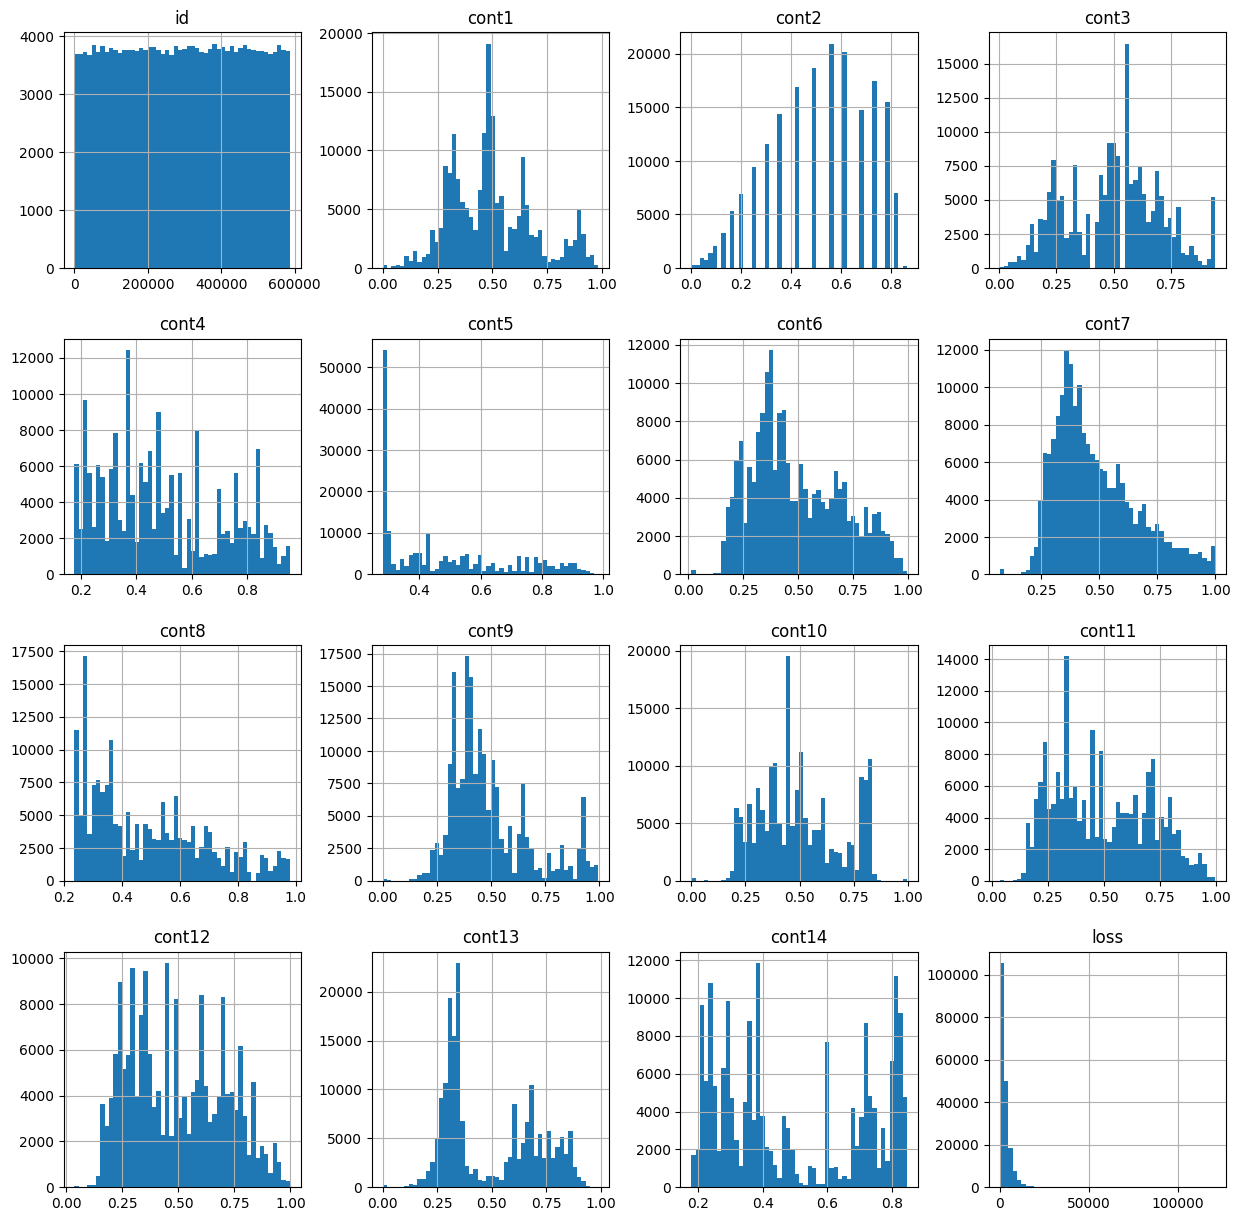

In [ ]:
df_tr.hist(bins=50, figsize=(15,15))

## **Preprocesar Archivo de Datos**

**Simulacion de data faltante**

Se eligen 3 columnas aleatorias para setiar el 5% de sus valores en nulo simulando informacion faltante ya que la data original esta completa.

In [ ]:
empties_qty = int(np.ceil(len(df_tr) * 0.05))

# Obtener 3 columnas numéricas para simular datos faltantes
cols_nan = df_tr.iloc[:,-15:-1].sample(n=3,axis='columns').columns

for column in cols_nan:
    print(column)
    print('Max: ' + str(max(df_tr.loc[:,column])))
    print('Min: ' + str(min(df_tr.loc[:,column])))
    print('Mean: ' + str(np.mean(df_tr.loc[:,column])))
    print('')

    nan_rows = df_tr.sample(n=empties_qty)
    nan_rows[column] = np.nan
    df_tr.loc[df_tr.index.isin(nan_rows.index),column] = nan_rows[column]

cont2
Max: 0.862654
Min: 0.001149
Mean: 0.507188356179441

cont4
Max: 0.954297
Min: 0.176921
Mean: 0.49181230258923736

cont6
Max: 0.997162
Min: 0.012683
Mean: 0.49094453373548996



Se remplazan los valores nulos con la media de la columna

In [ ]:
for col in cols_nan:
    mean = np.mean(df_tr[col])
    df_tr[col].fillna(mean, inplace=True)

False

In [ ]:
!pip install dabl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 564.3/564.3 kB 6.3 MB/s eta 0:00:00


In [ ]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function() {
    return False;
}

<IPython.core.display.Javascript object>

## Análisis de datos

Target looks like regression
Showing only top 10 of 62 categorical features


[<Axes: title={'center': 'Target distribution'}, xlabel='loss', ylabel='frequency'>,
 array([[<Axes: title={'center': 'F=7.45E-02'}, xlabel='cont2', ylabel='loss'>,
         <Axes: title={'center': 'F=6.54E-02'}, xlabel='cont3'>,
         <Axes: title={'center': 'F=4.97E-02'}, xlabel='cont7'>,
         <Axes: title={'center': 'F=4.96E-02'}, xlabel='cont11'>,
         <Axes: title={'center': 'F=-2.76E-02'}, xlabel='cont4'>],
        [<Axes: title={'center': 'F=2.66E-02'}, xlabel='cont8', ylabel='loss'>,
         <Axes: title={'center': 'F=-1.85E-02'}, xlabel='cont1'>,
         <Axes: title={'center': 'F=1.56E-02'}, xlabel='cont6'>,
         <Axes: title={'center': 'F=-1.43E-02'}, xlabel='cont5'>,
         <Axes: title={'center': 'F=7.11E-03'}, xlabel='cont13'>],
        [<Axes: title={'center': 'F=2.48E-03'}, xlabel='cont9', ylabel='loss'>,
         <Axes: title={'center': 'F=1.08E-03'}, xlabel='cont14'>,
         <Axes: title={'center': 'F=7.68E-04'}, xlabel='cont10'>,
         <Axes: 

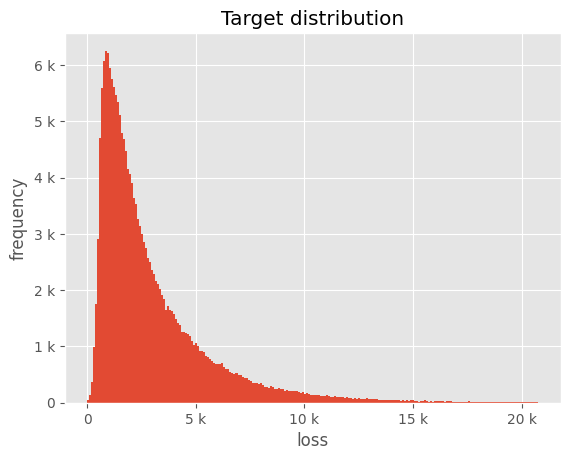

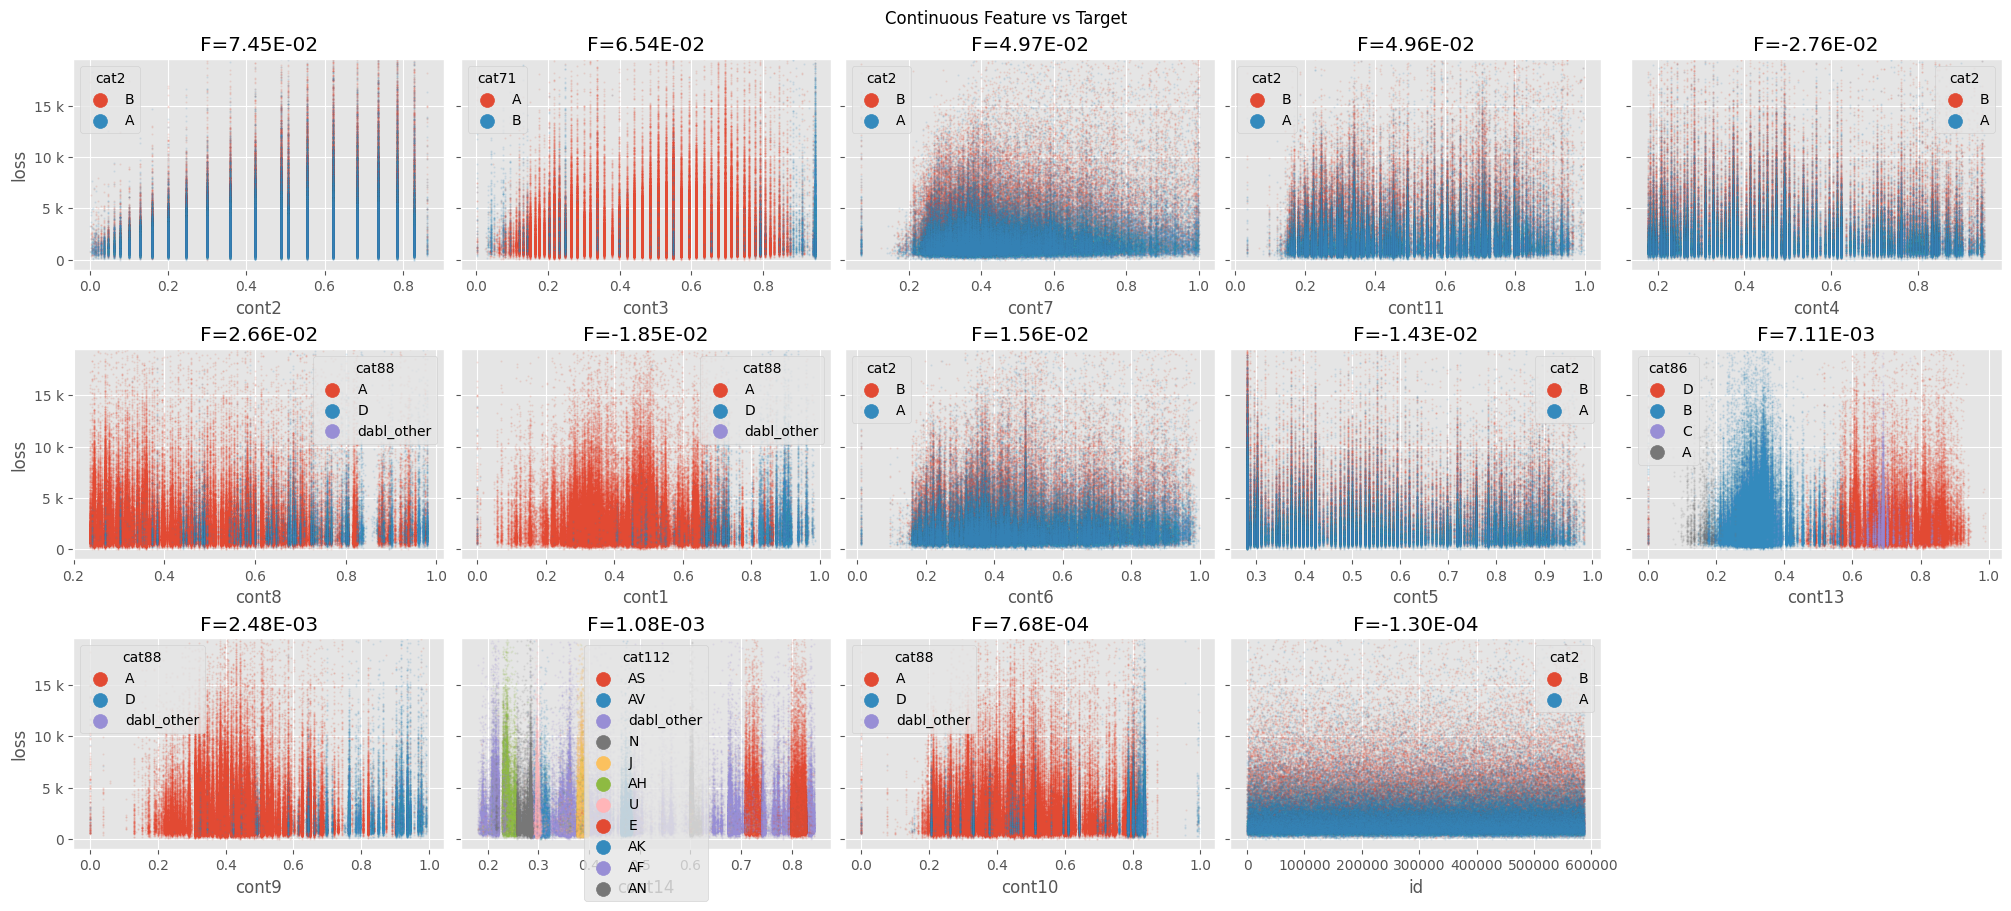

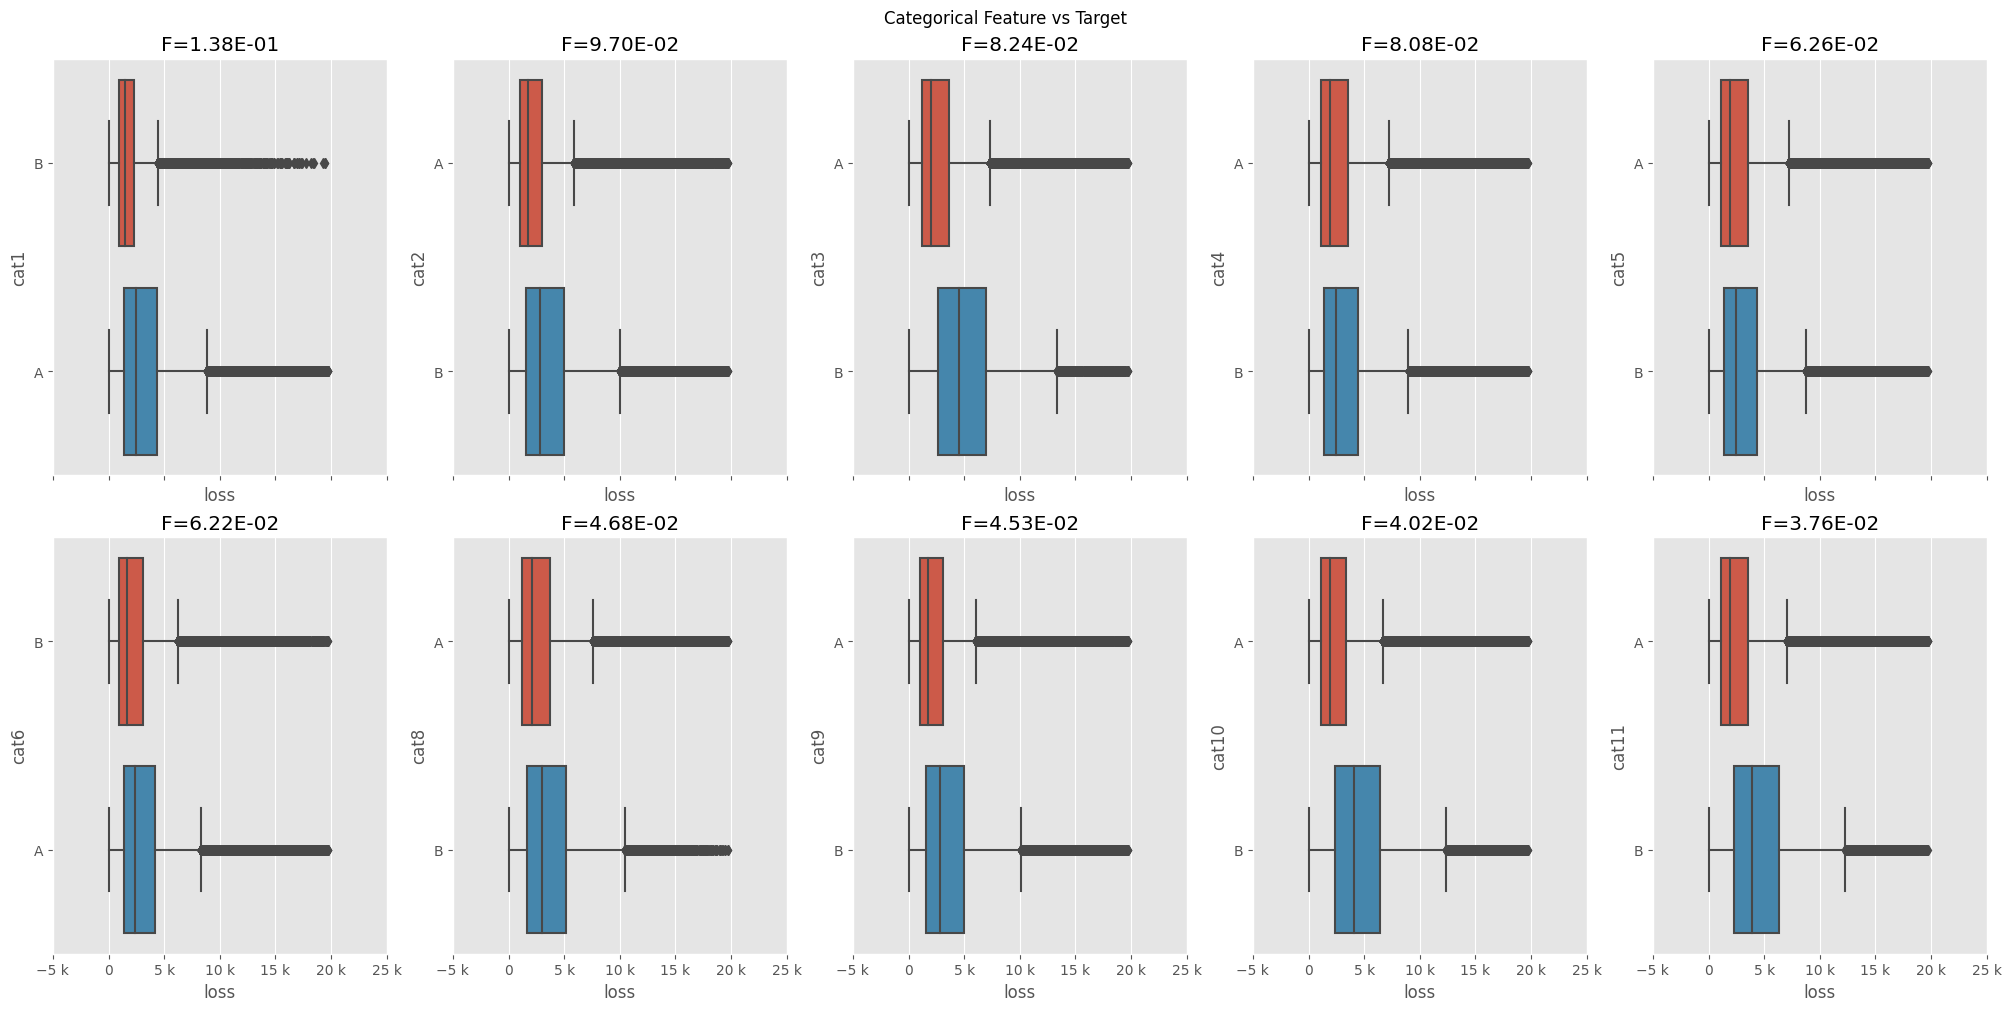

In [ ]:
import dabl
import warnings
import matplotlib.pyplot as plt
plt.style.use('ggplot')
warnings.filterwarnings('ignore')
dabl.plot(df_tr, target_col = 'loss')

**Conclusión de los graficos DABL**

 -  Los reclamos en su mayoria no superan en su mayoria los
  $20.000 USD.
 -Entre las características continuas: cont2, cont7, cont3,
  cont11, cont12, cont6, cont4, cont8, cont10, cont14, cont9, cont5, cont1, cont13 contribuyen predominantemente al monto de pérdida. Por ejemplo, cuando cont2 tiene un valor entre 0.6 y 0.8, el monto de pérdida es alto; cuando cont14 tiene un valor entre 0.2 y 0.4 o 0.6 y 0.8, el monto de pérdida es alto.

-  Entre las características categóricas: cat1, cat2, cat3,   
 cat4, cat5, cat6, cat8, cat9, cat10, cat11 contribuyen principalmente al monto de pérdida. Por ejemplo, cuando cat1 tiene el valor 'A', el monto de pérdida es alto. Además, cuando cat3 tiene el valor 'A', el monto de pérdida es alto.  

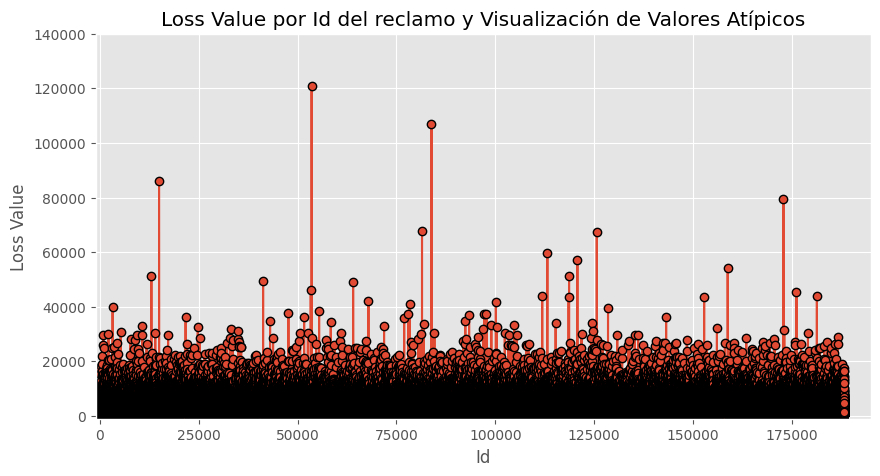

In [ ]:
plt.figure(figsize=(10,5))
plt.xlabel('Id')
plt.ylabel('Loss Value')
plt.title('Loss Value por Id del reclamo y Visualización de Valores Atípicos')
plt.xlim([-1000, 195000])
plt.ylim([-1000, 140000])
plt.plot(df_tr.index, df_tr["loss"], marker='o', markeredgecolor='k')
plt.show()

En el gráfico anterior visualizamos el monto de pérdida por identificación de reclamo. Este gráfico también resalta los montos atípicos de reclamo. Podemos identificar el valor atípico más alejado con un monto de pérdida cercano a 120,000 USD.

##Validación Adversaria:
Es importante comparar la distribución general del conjunto de entrenamiento y del conjunto de prueba. Para mejorar la calidad de la predicción en el conjunto de prueba, es necesario asegurarse de que ambos conjuntos de datos sigan una distribución casi similar. Para verificar esto, eliminaremos las etiquetas objetivo del conjunto de entrenamiento y lo fusionaremos con el conjunto de prueba para crear un conjunto de datos grande. Luego etiquetaremos los puntos de datos de entrenamiento con "1" y los puntos de datos de prueba con "0". Después, aplicaremos algoritmos de aprendizaje automático para verificar la métrica ROC_AUC. Si la métrica ROC_AUC es mucho mayor que el 50% (preferiblemente por encima del 60%), podemos concluir que hay una diferencia significativa entre la distribución de datos de entrenamiento y prueba. Este procedimiento se conoce como Validación Adversaria.

In [ ]:
from copy import deepcopy
df_test = loss_amount_test.copy()

train_d = df_tr.drop(['id','loss'], axis=1)
test_d = df_test.drop(['id'], axis=1)
train_d['Target'] = 1
test_d['Target'] = 0

prep_data = pd.concat((train_d, test_d))

data_le = deepcopy(prep_data)

list_of_cat_cols = list(df_tr.select_dtypes(include=['object']).columns)
for c in range(len(list_of_cat_cols)):
    data_le[list_of_cat_cols[c]] = data_le[list_of_cat_cols[c]].astype('category').cat.codes

prep_data = pd.get_dummies(data=prep_data, columns=list_of_cat_cols)

In [ ]:
import numpy as np
data = prep_data.iloc[np.random.permutation(len(prep_data))]
data.reset_index(drop = True, inplace = True)

x = data.drop(['Target'], axis = 1)
y = data.Target

few_examples = 50000

x_train = x[:few_examples]
x_test = x[few_examples:]
y_train = y[:few_examples]
y_test = y[few_examples:]

Estamos utilizando dos clasificadores: Regresión Logística y Bosque Aleatorio para comprobar si son lo suficientemente capaces de separar los puntos de datos de entrenamiento y prueba.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score as AUC
from sklearn.model_selection import cross_val_score
import warnings

warnings.filterwarnings('ignore')

clf_lr = LogisticRegression()
clf_lr.fit(x_train, y_train)
pred = clf_lr.predict_proba(x_test)[:,1]
auc_lr = AUC(y_test, pred)
print("Logistic Regression ROC_AUC: {:.2%}".format(auc_lr))

clf_rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
clf_rf.fit(x_train, y_train)
pred = clf_rf.predict_proba(x_test)[:,1]
auc_rf = AUC(y_test, pred)
print("Random Forest ROC_AUC: {:.2%}".format(auc_rf))

scores_lr = cross_val_score(LogisticRegression(), x, y, scoring='roc_auc', cv=2)
print("Mean ROC_AUC for Logistic Regression : {:.2%}, std: {:.2%}".format( scores_lr.mean(), scores_lr.std()))

scores_rf = cross_val_score(RandomForestClassifier(n_estimators=100, n_jobs=-1), x, y, scoring='roc_auc', cv=2)
print("Mean ROC_AUC for Random Forest : {:.2%}, std: {:.2%}".format( scores_rf.mean(), scores_rf.std()))

Logistic Regression ROC_AUC: 50.05%
Random Forest ROC_AUC: 54.28%
Mean ROC_AUC for Logistic Regression : 50.14%, std: 0.03%
Mean ROC_AUC for Random Forest : 55.45%, std: 0.05%


Los resultados anteriores muestran que la puntuación ROC-AUC es apenas un 50% marginal. Por lo tanto, los clasificadores no pueden separar claramente los puntos de datos de entrenamiento y prueba. Podemos concluir que los puntos de datos de entrenamiento y prueba son homogéneos y hay una baja posibilidad de sobreajuste del modelo.

  **-Proyección en PCA bidimensional:**

A continuación, también visualizaremos ambos puntos de datos utilizando PCA. En primer lugar, estamos descomponiendo las características en 2 componentes principales y observaremos el gráfico de proyección en 2D.

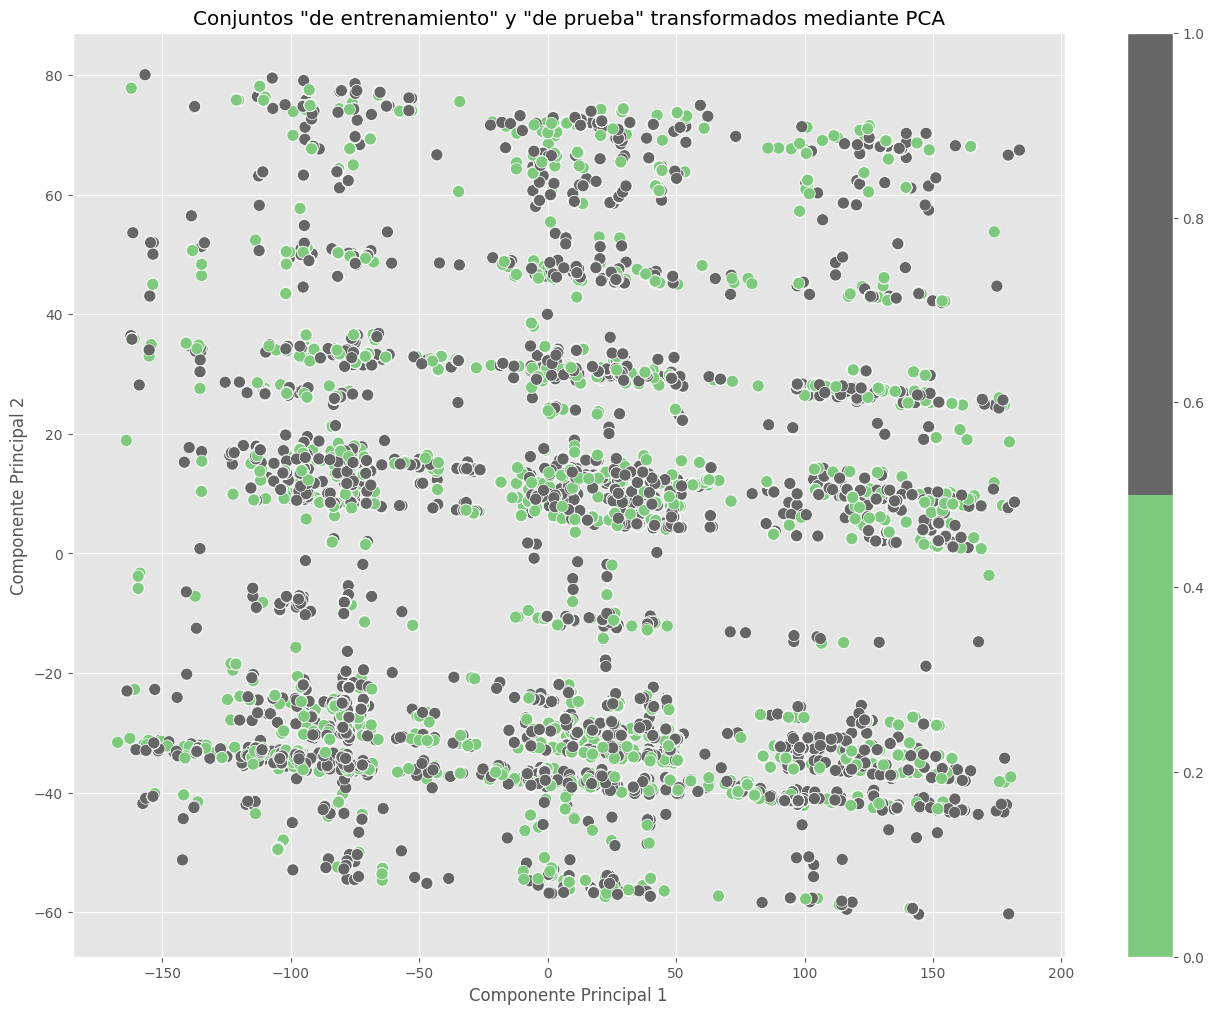

In [ ]:
from sklearn.decomposition import PCA

# Shuffle
data_le = data_le.iloc[np.random.permutation(len(data_le))]
X = data_le.iloc[:, :130]
y = data_le.iloc[:, 130:]
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Train = 1, Test = 0
plt.figure(figsize=(16,12))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=np.array(y),
            edgecolor='white', s=75,
            cmap=plt.cm.get_cmap('Accent',2))
plt.title('Conjuntos "de entrenamiento" y "de prueba" transformados mediante PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar()
plt.show()

**Análisis de correlación**

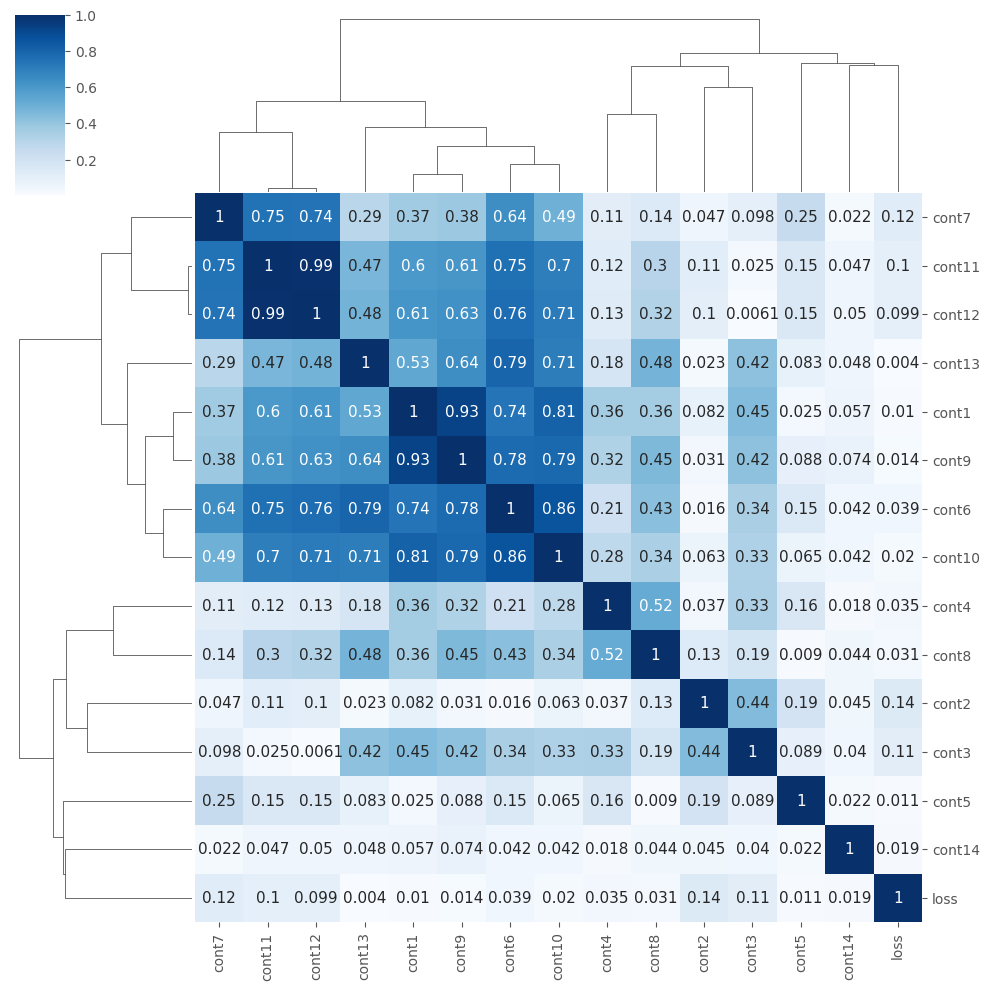

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df_corr = df_tr.iloc[:,-15:].corr().abs()
map = sns.clustermap(df_corr, annot = True, annot_kws = {'size': 11}, cmap = 'Blues')
map

Entonces, la correlación más alta es entre cont11 y cont12. No hay una correlación perfecta de 1 entre ninguna pareja. Verificaremos las correlaciones representando un mapa de calor jerárquico. El objetivo es identificar el conjunto de características continuas que tienen una tendencia de correlación similar entre sí.

Visualmente, hay dos grupos principales:

Uno con correlaciones muy altas entre sí: cont7, cont11, cont12, cont13, cont1, cont9, cont6, cont10.
El otro tiene correlaciones débiles entre sí: cont4, cont8, cont2, cont3, cont5, cont14. La variable objetivo "loss" no tiene una correlación muy alta con ninguna variable continua.

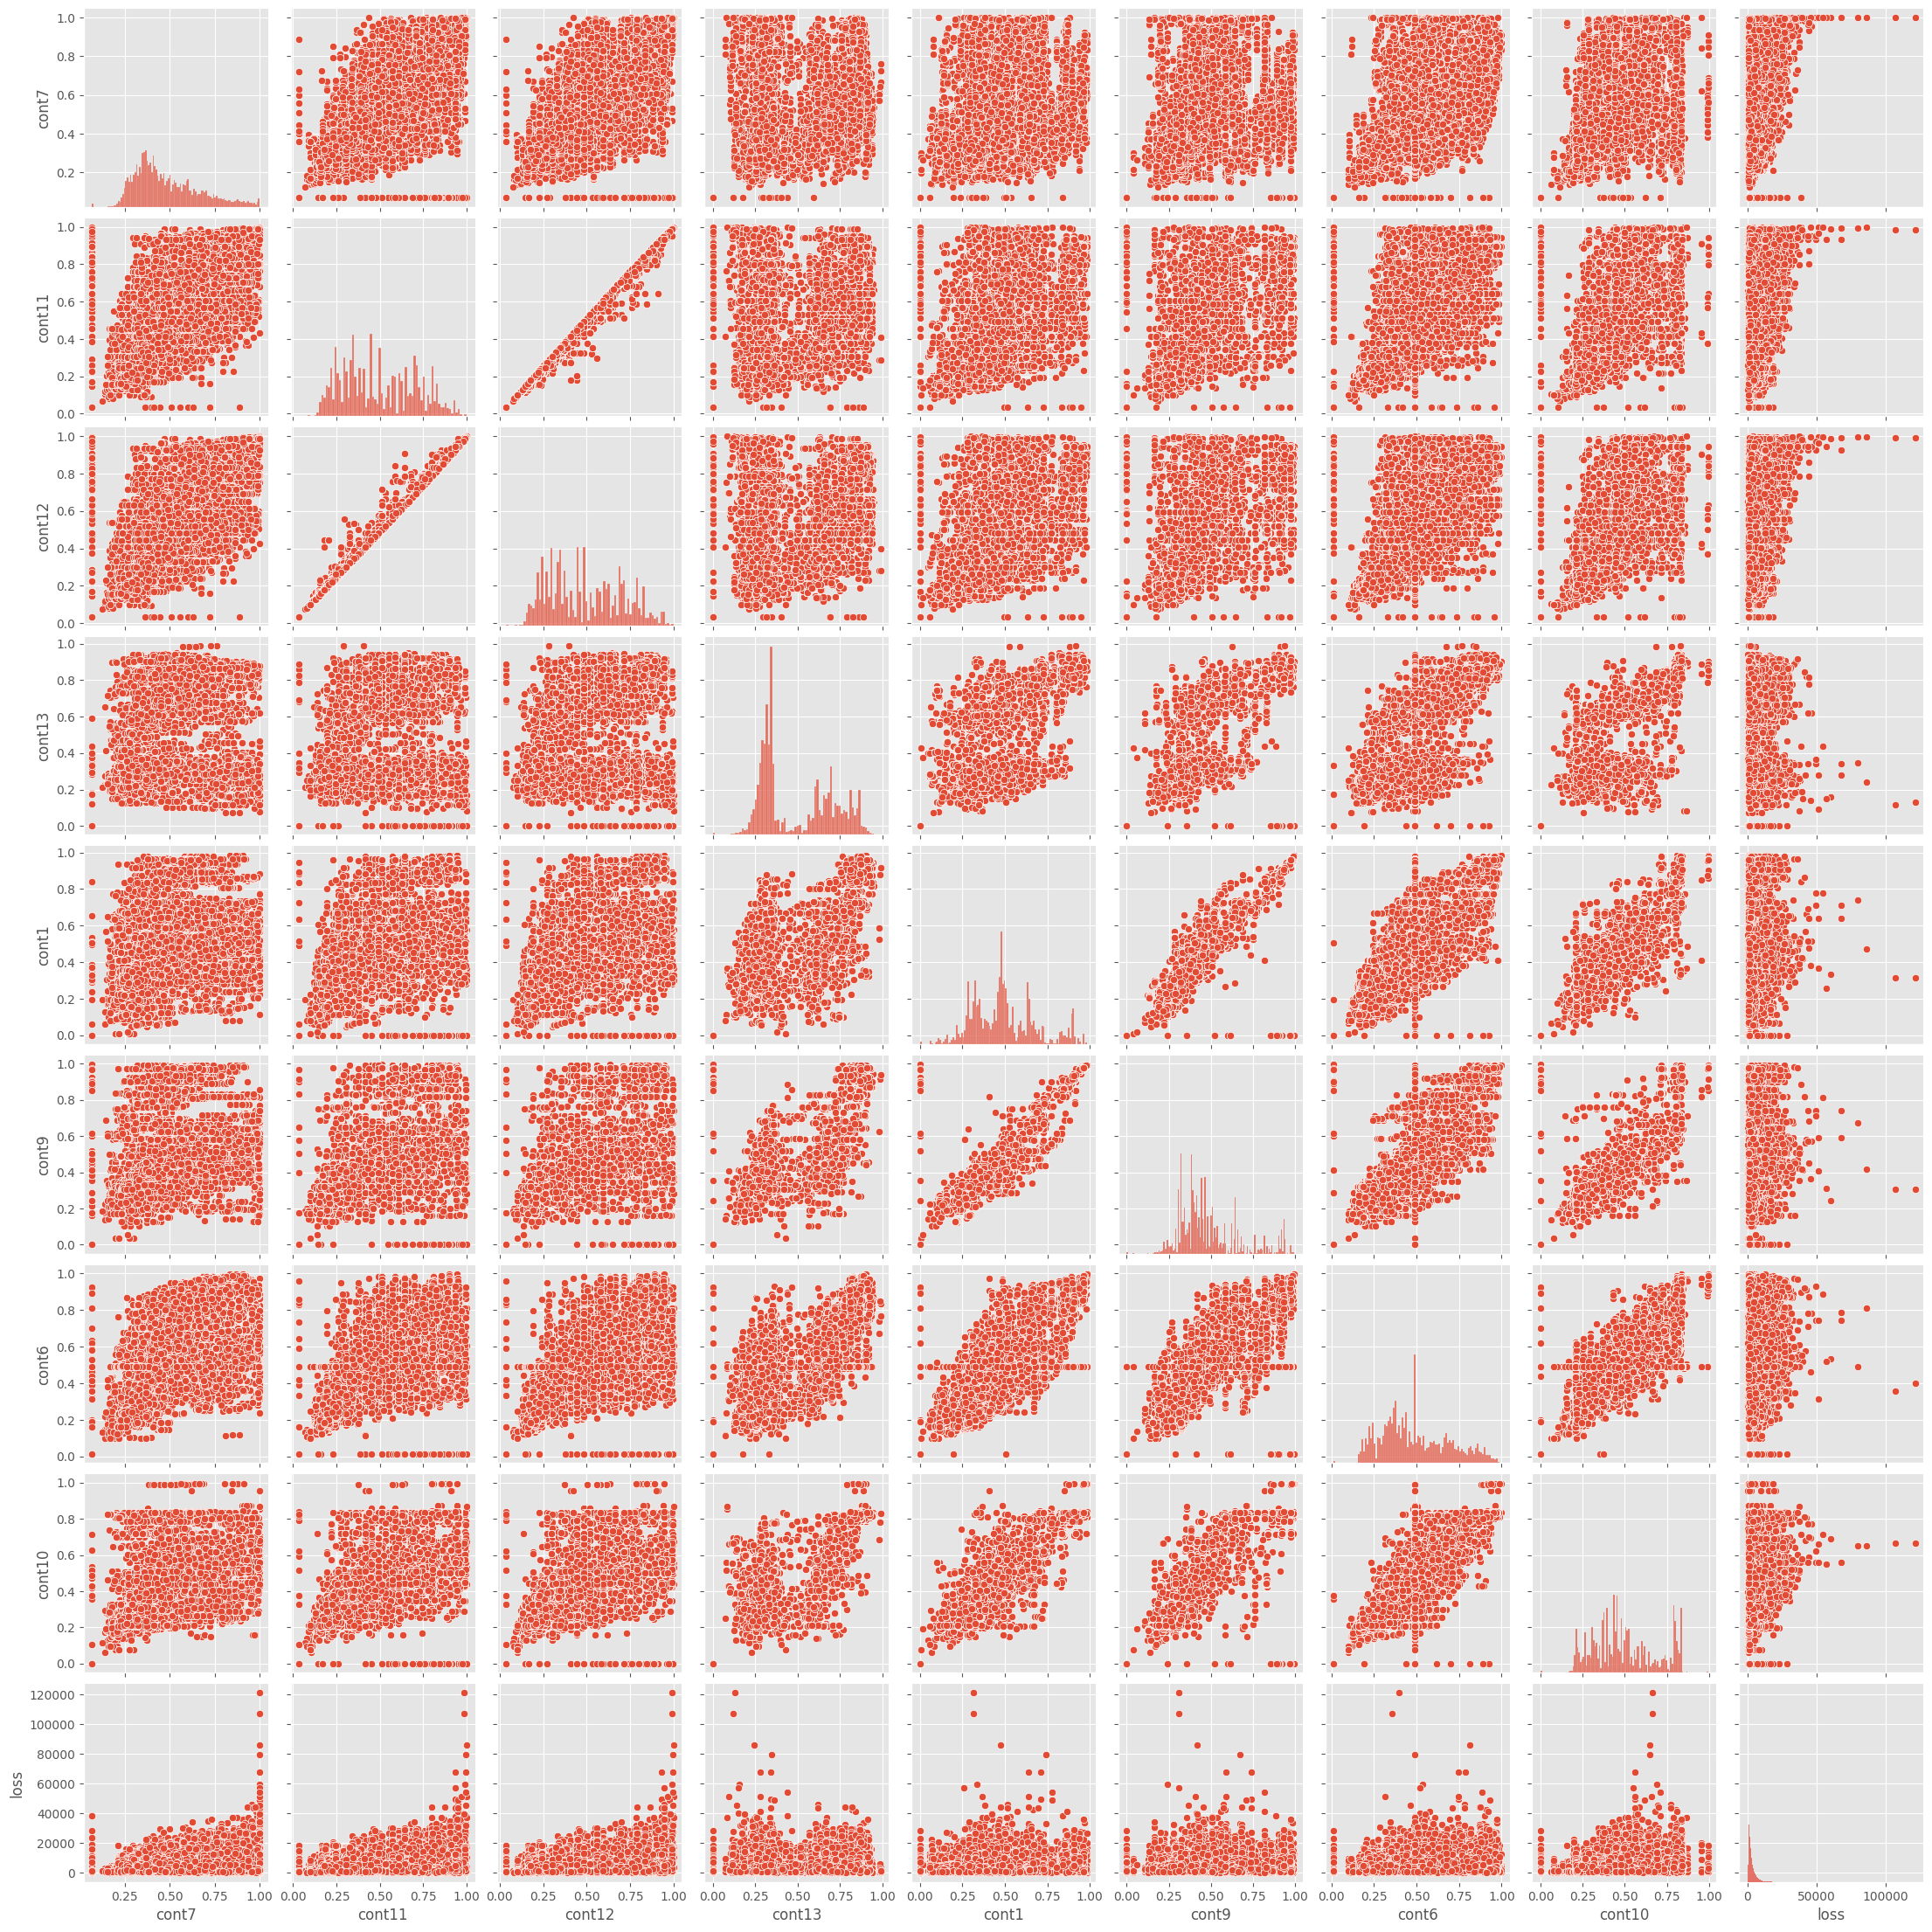

In [ ]:
sns.pairplot(df_tr, vars=["cont7", "cont11", "cont12", "cont13", "cont1", "cont9", "cont6", "cont10", "loss"])
plt.show()

Se observa una relación lineal pronunciada entre: (cont11, cont12) y una relación lineal entre: (cont1, cont9).

Ahora, convertimos variables categoricas en cotinuas

In [ ]:
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in df_tr.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    df_tr[col] = lencoders[col].fit_transform(df_tr[col])

In [ ]:
from sklearn.preprocessing import LabelEncoder
lencoders_2 = {}
for col in df_test.select_dtypes(include=['object']).columns:
    lencoders_2[col] = LabelEncoder()
    df_test[col] = lencoders_2[col].fit_transform(df_test[col])

In [ ]:
corr_mat_2 = df_tr.iloc[:,1:116].corr()

In [ ]:
threshold = 0.8
high_corrs_2 = (corr_mat_2[abs(corr_mat_2) > threshold][corr_mat_2 != 1.0]) .unstack().dropna().to_dict()
unique_high_corrs_2 = pd.DataFrame(list(set([(tuple(sorted(key)), high_corrs_2[key]) for key in high_corrs_2])), columns=['cat_feature_pair', 'correlation_coefficient'])
unique_high_corrs_2 = unique_high_corrs_2.loc[abs(unique_high_corrs_2['correlation_coefficient']).argsort()[::-1]]
unique_high_corrs_2

cat_feature_pair  correlation_coefficient
9      (cat3, cat90)                 0.955738
3      (cat7, cat89)                 0.955504
8       (cat2, cat9)                 0.932420
1      (cat50, cat6)                 0.925731
11    (cat102, cat8)                 0.900799
2     (cat86, cat98)                 0.886774
6      (cat66, cat8)                 0.862231
4    (cat115, cat86)                 0.850152
0     (cat111, cat4)                 0.829929
10  (cat107, cat115)                 0.829241
7     (cat114, cat6)                 0.827932
5      (cat57, cat7)                 0.809418

Aquí también la correlación más alta que observamos es alrededor de 0.9557. Ningún par tiene un valor de 1. Vamos a visualizarlo.

<Axes: >

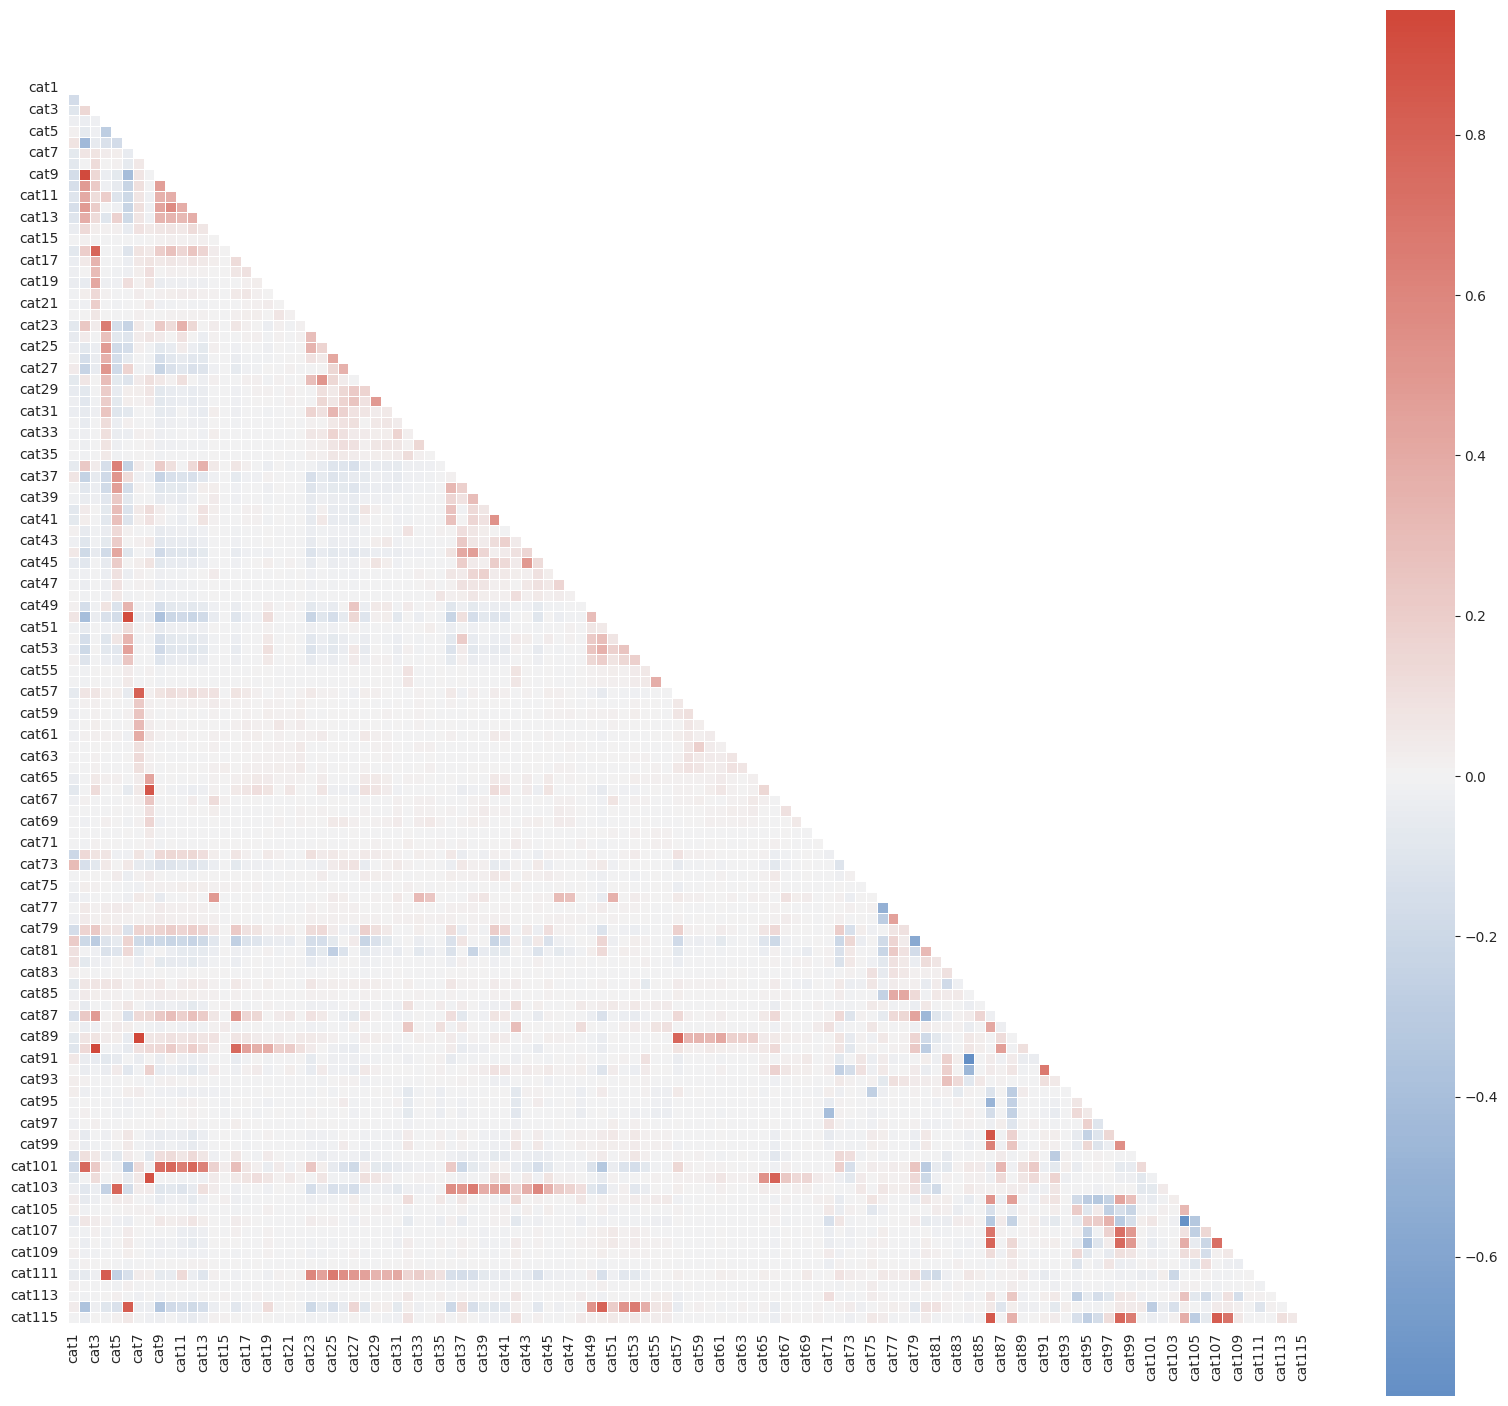

In [ ]:
# mapa de calor de la correlación
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})
mask = np.triu(np.ones_like(corr_mat_2, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(250, 15, as_cmap=True)
sns.heatmap(corr_mat_2, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=False, linewidths=.5, cbar_kws={"shrink": 0.9})

##Importancia de las características:
De las 130 características, verificaremos cuáles tienen una contribución dominante hacia la variable "loss". Aquí hemos elegido las 30 principales características.

In [ ]:
def get_feature_importance_df(feature_importances,
                              column_names,
                              top_n=30):

    imp_dict = dict(zip(column_names, feature_importances))

    # Se obtiene el nombre de las caracteristicas ordenadas
    top_features = sorted(imp_dict, key=imp_dict.get, reverse=True)[0:top_n]

    # Se obtienen los valores
    top_importances = [imp_dict[feature] for feature in top_features]

    # crea un datafrema con la importancia de las caracteristicas
    df = pd.DataFrame(data={'feature': top_features, 'importance': top_importances})
    return df

In [ ]:
import numpy as np

def get_col(df: 'dataframe', type_descr: 'numpy') -> list:

    try:
        col = (df.describe(include=type_descr).columns)  # pandas.core.indexes.base.Index
    except ValueError:
        print(f'Dataframe not contains {type_descr} columns !', end='\n')
    else:
        return col.tolist()

list_columns = get_col(df=df_tr, type_descr=[np.object, np.number])

In [ ]:
list_columns.remove('loss')

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = df_tr.shape[1],
                            max_depth = 8,
                            min_samples_leaf = df_tr.shape[1],
                            max_features = 0.2,
                            n_jobs = -1)

In [ ]:
rf.fit(df_tr[list_columns], df_tr['loss'])
features = df_tr[list_columns].columns.values

In [ ]:
feature_importance = get_feature_importance_df(rf.feature_importances_, features)
display(feature_importance)

feature  importance
0    cat80    0.246922
1    cat79    0.177491
2    cat87    0.073304
3    cat57    0.067518
4   cat101    0.056615
5    cat12    0.046137
6    cat81    0.037247
7    cont2    0.032000
8    cont7    0.030757
9     cat7    0.024712
10   cat89    0.019059
11  cont12    0.018656
12   cat10    0.017323
13  cont11    0.016136
14    cat1    0.015861
15   cat72    0.012118
16    cat2    0.010087
17  cat103    0.009640
18   cont3    0.008850
19   cat94    0.008419
20  cat106    0.005545
21  cat114    0.005072
22  cat111    0.004776
23   cat11    0.004564
24   cat53    0.003940
25   cat13    0.003479
26  cat100    0.003290
27    cat9    0.003063
28   cat38    0.002233
29   cat44    0.002084

Esta es la lista de las 30 caracteristicas mas importantes y se visualizan en el siguiente gráfico

[Text(0.5, 0, 'Variable Names'),
 Text(0, 0.5, 'Importance'),
 Text(0.5, 1.0, 'Feature Importances')]

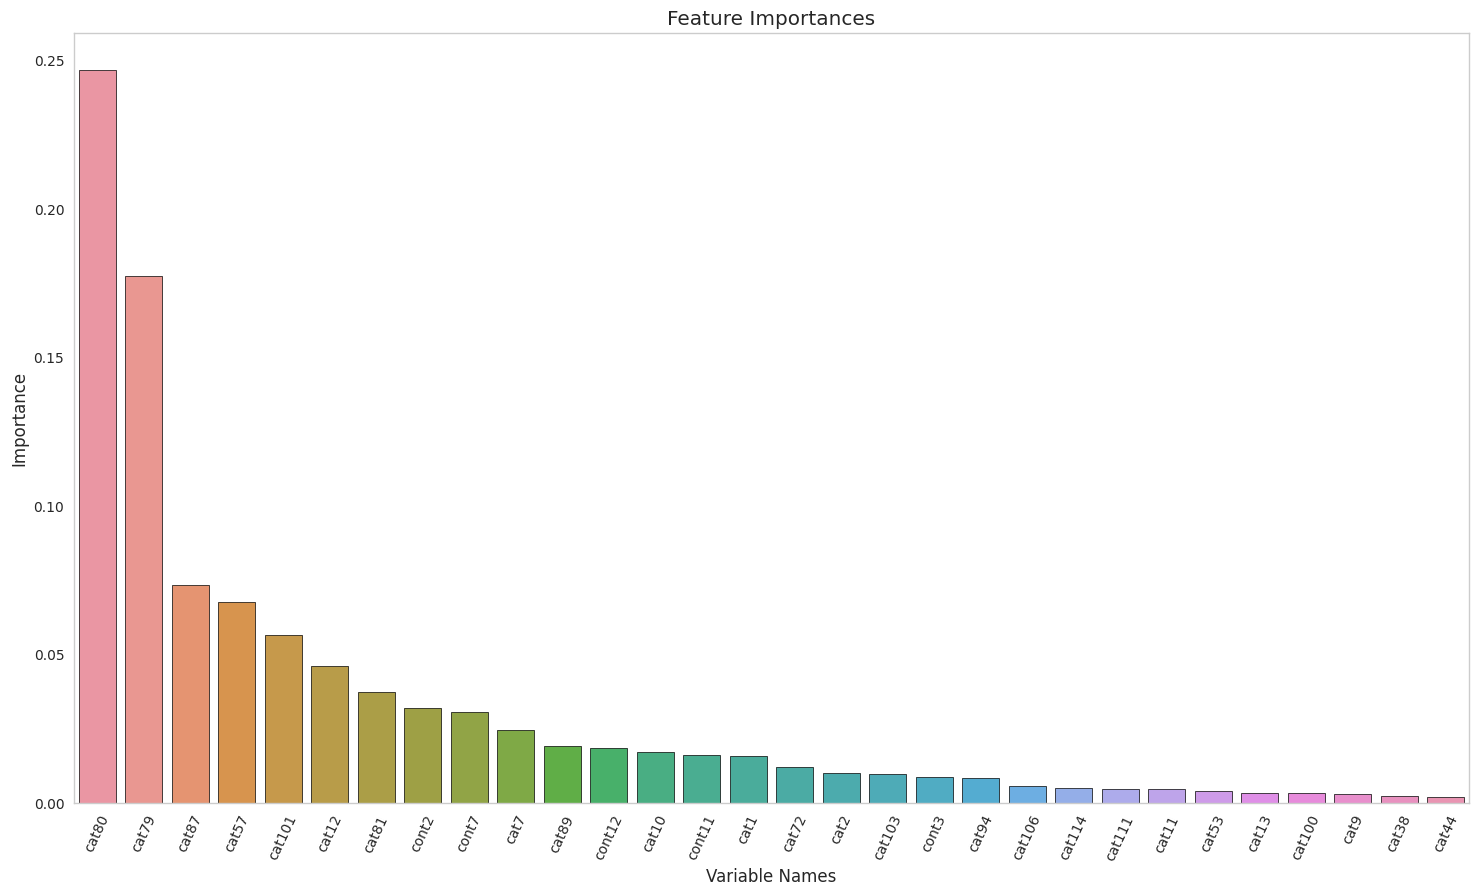

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig,ax = plt.subplots()
plt.xticks(rotation=65)

fig.set_size_inches(18,10)
#sns.set_color_codes('pastel')
sns.barplot(data=feature_importance[:30],
            x="feature",
            y="importance",
            edgecolor='k',
            ax=ax)
ax.set(xlabel="Variable Names",
       ylabel='Importance',
       title="Feature Importances")

Vemos que principalmente las variables categóricas tienen una alta importancia de características. Solo algunas variables continuas como cont2, cont7, cont12 y cont11 tienen una alta importancia de características.

##Transformación de características:
Vamos a verificar la asimetría de la variable objetivo. Una variable altamente sesgada no es deseada en el modelo de entrenamiento, ya que viola la normalidad. Para este propósito, experimentaremos con la aplicación simple de la transformación logarítmica en la variable objetivo "loss" y la aplicación del logaritmo en (loss+100). Después, verificaremos la conformidad con la normalidad mediante el gráfico QQ-plot.

In [ ]:
df_tr['loss'].skew()

3.7949583775378604

Claramente, la distribución está notablemente sesgada. (Un valor de sesgo de '3' indica una desviación significativa del sesgo deseado de '0').

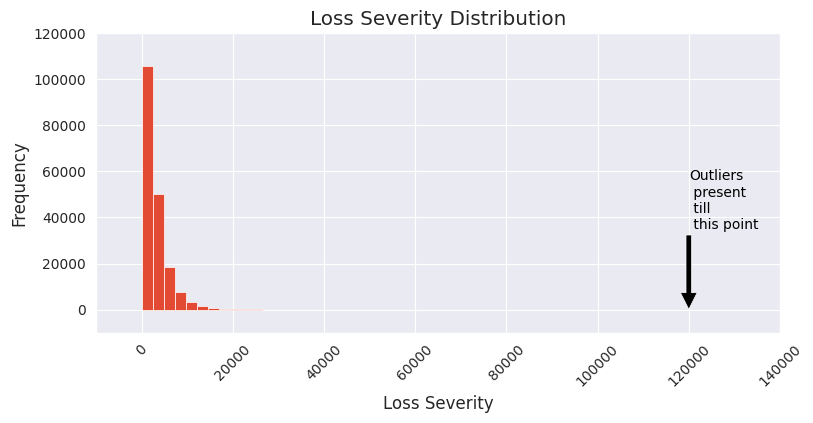

In [ ]:
sns.set_style("darkgrid", {'axes.grid' : False})
plt.figure(figsize = (8, 4))
plt.title('Loss Severity Distribution')
plt.xlabel('Loss Severity')
plt.ylabel('Frequency')
df_tr['loss'].hist(bins=50)
plt.tight_layout()
xt = plt.xticks(rotation=45)
plt.xlim([-10000,140000])
plt.ylim([-10000,120000])
plt.annotate('Outliers\n present\n till\n this point', xy=(120000, 100), xytext=(120000, 35000), arrowprops=dict(facecolor='black'), color='black')
plt.show()

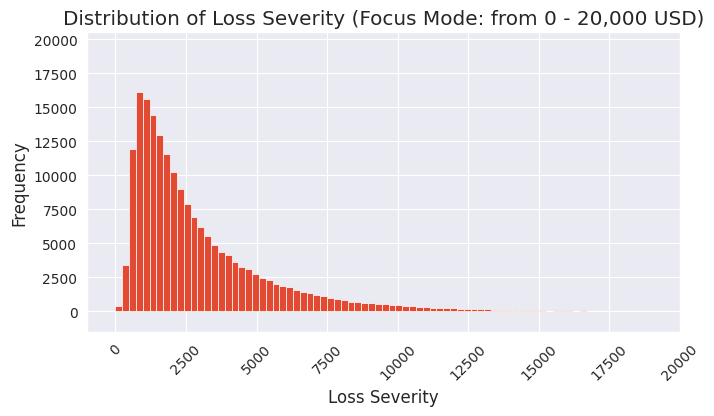

In [ ]:
plt.figure(figsize = (7, 4))
plt.title('Distribution of Loss Severity (Focus Mode: from 0 - 20,000 USD)')
plt.xlabel('Loss Severity')
plt.ylabel('Frequency')
df_tr['loss'].hist(bins=500)
plt.tight_layout()
xt = plt.xticks(rotation=45)
plt.xlim([-1000,20000])
plt.ylim([-1500,20500])
plt.show()

Categorical Columns Data Transformation

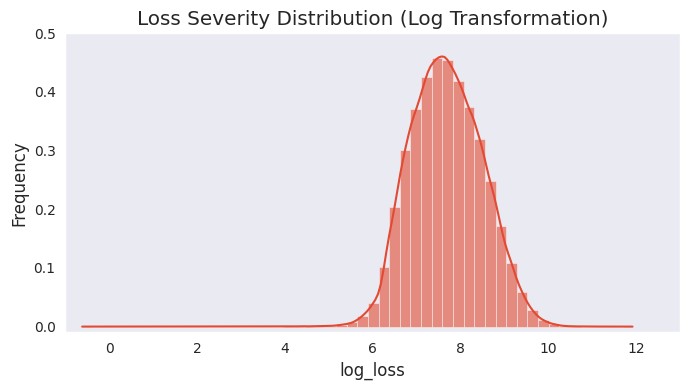

In [ ]:
df_tr['log_loss'] = np.log(df_tr['loss'])

plt.figure(figsize = (7, 4))
plt.title('Loss Severity Distribution (Log Transformation)')
plt.xlabel('Log Loss Severity')
plt.ylabel('Frequency')
sns.distplot(df_tr['log_loss'], kde = True, hist_kws={'alpha': 0.60})
plt.tight_layout()
xt = plt.xticks(rotation=0)
plt.xlim([-1,13])
plt.ylim([-0.01,0.5])
plt.show()


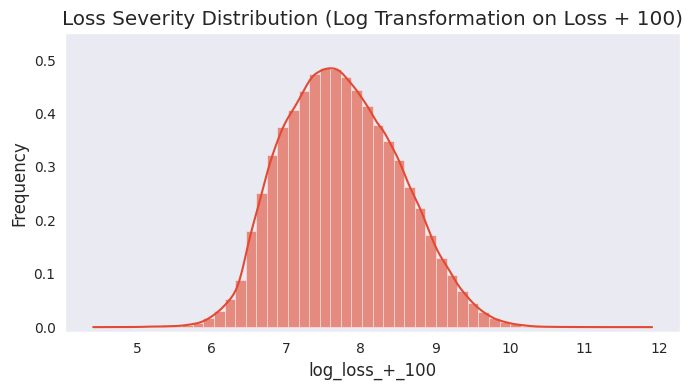

In [ ]:
df_tr['log_loss_+_100'] = np.log(100 + df_tr['loss'])

plt.figure(figsize = (7, 4))
plt.title('Loss Severity Distribution (Log Transformation on Loss + 100)')
plt.xlabel('Complex Log Loss Severity')
plt.ylabel('Frequency')
sns.distplot(df_tr['log_loss_+_100'], kde = True, hist_kws={'alpha': 0.60})
plt.tight_layout()
xt = plt.xticks(rotation=0)
plt.ylim([-0.01,0.55])
plt.show()

En las 2 pruebas de transformación se nota una curva simétrica en forma de campana. Ahora, vamos a verificar la asimetría de las variables objetivo transformadas.

In [ ]:
df_tr['log_loss'].skew()

0.09297454555136214

In [ ]:
df_tr['log_loss_+_100'].skew()

0.2181538565093051

Entonces, log(loss) ha proporcionado una menor asimetría en comparación con la asimetría dada por log(loss+100). Ahora, dibujemos los gráficos QQ-plot para verificar cuál cumple mejor con la normalidad. Un gráfico Q-Q es un gráfico de dispersión creado al trazar dos conjuntos de cuantiles entre sí. Si ambos conjuntos de cuantiles provienen de la misma distribución, deberíamos ver que los puntos forman una línea que es aproximadamente recta, como se muestra a continuación.

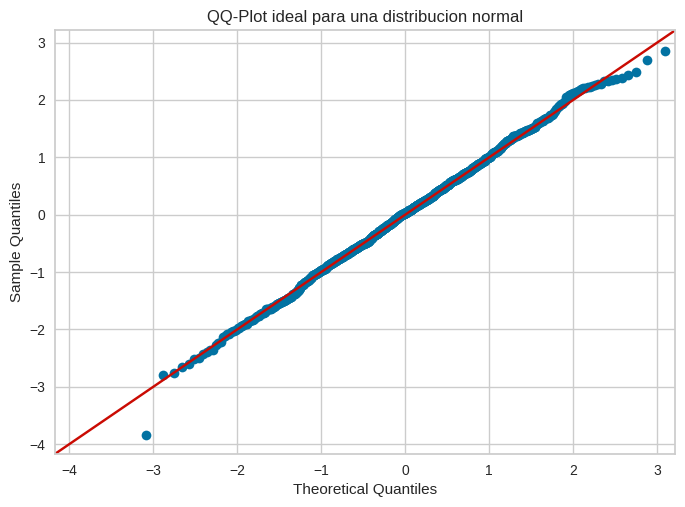

In [ ]:
import statsmodels.api as sm
sample = np.random.normal(0,1, 1000)
sm.qqplot(sample, line='45')
plt.title('QQ-Plot ideal para una distribucion normal')
plt.show()

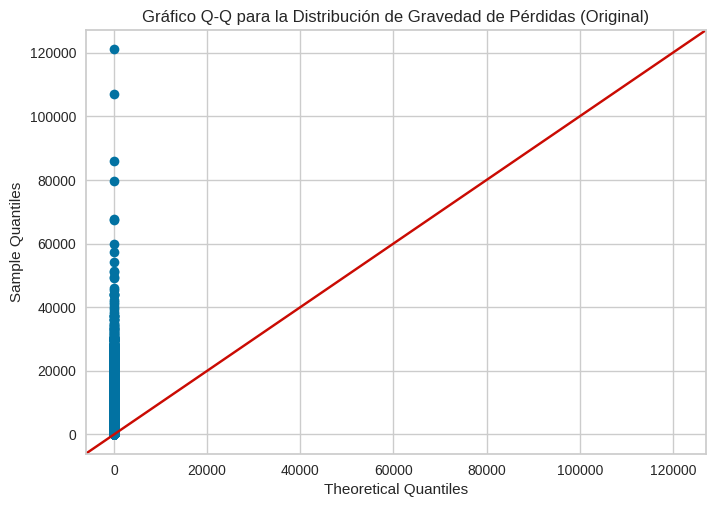

In [ ]:
sm.qqplot(df_tr['loss'], line='45')
plt.title('Gráfico Q-Q para la Distribución de Gravedad de Pérdidas (Original)')
plt.show()

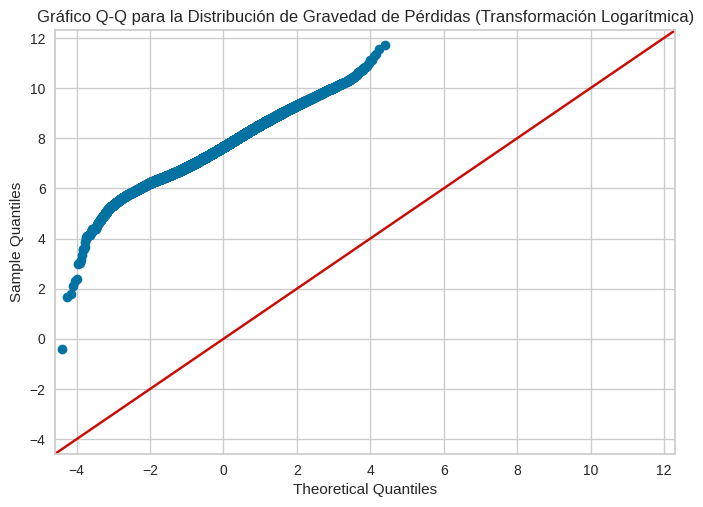

In [ ]:
sm.qqplot(df_tr['log_loss'], line='45')
plt.title('Gráfico Q-Q para la Distribución de Gravedad de Pérdidas (Transformación Logarítmica)')
plt.show()

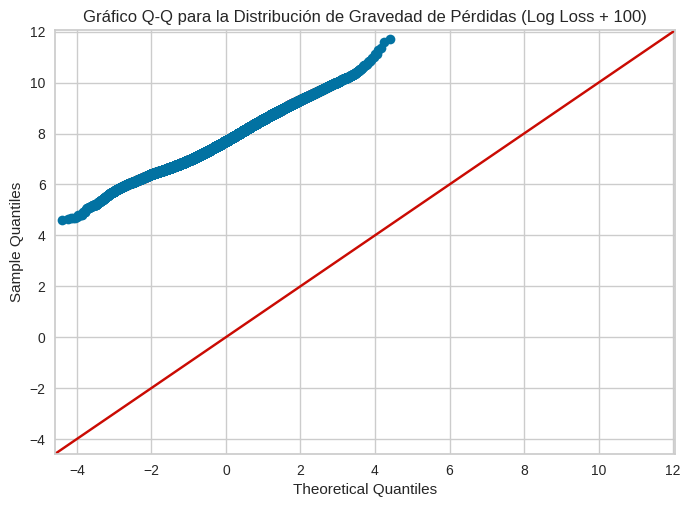

In [ ]:
sm.qqplot(df_tr['log_loss_+_100'], line='45')
plt.title('Gráfico Q-Q para la Distribución de Gravedad de Pérdidas (Log Loss + 100)')
plt.show()

Aquí también observamos que el Q-Q plot para la simple transformación logarítmica de la pérdida es paralelo a la línea roja diagonal. Por lo tanto, trabajaremos con 'log_loss' como variable objetivo transformada para fines de entrenamiento. A continuación, procedemos a dividir el conjunto de datos en conjuntos de train y test.
##División Train-Test

In [ ]:
from sklearn.model_selection import train_test_split
seed = 12345

trainx = ['cat80', 'cat79', 'cat87', 'cat57', 'cat101', 'cat12', 'cont2', 'cat81', 'cat89', 'cont7', 'cat7', 'cat10', 'cont12', 'cont11', 'cat1', 'cat72', 'cat103', 'cat94',
                    'cat2', 'cont3', 'cat11', 'cat106', 'cat111', 'cat114', 'cat53', 'cat13', 'cat9', 'cont6', 'cat100', 'cat44']
trainy = df_tr.columns[-2]
X = df_tr[trainx]
Y = df_tr[trainy]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=seed)

#Modelos de regresión

##Regresión lineal

In [ ]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, make_scorer, SCORERS

model1 = LinearRegression(n_jobs=-1)
mae_val= make_scorer(mean_absolute_error, greater_is_better=False)
results1 = cross_val_score(model1, X_train, y_train, cv=5, scoring=mae_val, n_jobs=-1)
print("Linear Regression (Manual Tuning): ({0:.3f}) +/- ({1:.3f})".format(-1*results1.mean(), results1.std()))

Linear Regression (Manual Tuning): (0.472) +/- (0.002)


In [ ]:
X2 = sm.add_constant(X)
model = sm.OLS(Y, X2)
model_ = model.fit()
print(model_.summary())

                            OLS Regression Results                            
Dep. Variable:               log_loss   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     5249.
Date:                Sat, 25 Nov 2023   Prob (F-statistic):               0.00
Time:                        15:44:13   Log-Likelihood:            -1.7074e+05
No. Observations:              188318   AIC:                         3.415e+05
Df Residuals:                  188287   BIC:                         3.419e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1710      0.021    346.642      0.0

Entonces, la regresión de mínimos cuadrados ordinarios está dando un valor de R2 alrededor del 45%, lo cual es en realidad un valor débil para el modelo. Además, valores altos de AIC y BIC no indican un buen ajuste.
##Regresión Ridge (Penalización L2):
Ridge es una forma de regularizar la regresión para evitar el sobreajuste. Para disminuir la complejidad del modelo, se reduce el número de características penalizando la suma de los coeficientes al cuadrado (coeficientes β) de algunas características redundantes, acercándolos a cero (nunca exactamente cero). Idealmente, cuando usamos λ (penalización de regularización) que tiende a infinito, β tiende a "0". Aquí, estamos utilizando la regresión Ridge de la biblioteca scikit-learn con un parámetro de regularización (α) igual a 1.

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, make_scorer, SCORERS

model2 = Ridge(alpha=1,random_state=seed)
mae_val= make_scorer(mean_absolute_error, greater_is_better=False)
results2 = cross_val_score(model2, X_train, y_train, cv=5, scoring= mae_val, n_jobs=1)
print("Regresión lineal Ridge (Manual Tuning): ({0:.3f}) +/- ({1:.3f})".format(results2.mean(), results2.std()))

Linear Regression Ridge (Manual Tuning): (-0.472) +/- (0.002)


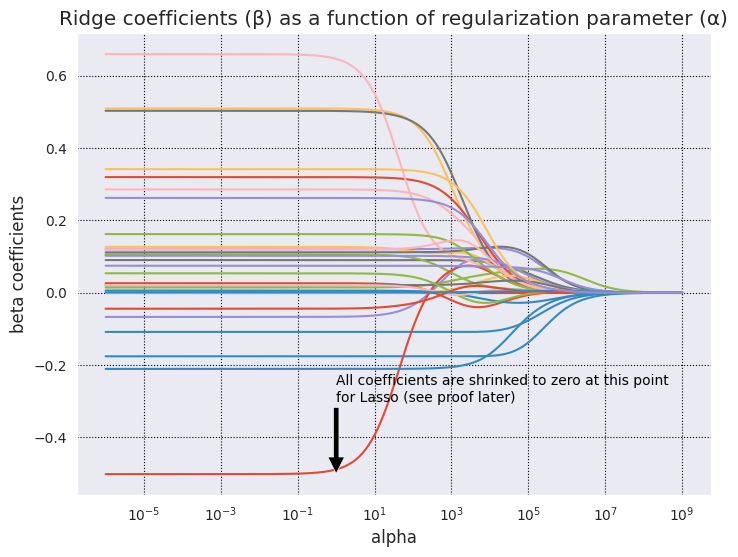

Total Run Time:
22.05107328899976 Seconds


In [ ]:
import time

start_time = time.perf_counter()
clf = Ridge()
coefs = []

alphas = np.logspace(-6, 9, 200)

for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X2, Y)
    coefs.append(clf.coef_)

plt.figure(figsize=(18, 6))
plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('beta coefficients')
plt.title('Ridge coefficients (β) as a function of regularization parameter (α)')
plt.axis('tight')
plt.annotate('All coefficients are shrinked to zero at this point \nfor Lasso (see proof later)',
xy=(1, -0.5), xytext=(1, -0.3), arrowprops=dict(facecolor='black'), color='black')
plt.grid(color='black', linestyle='dotted')
plt.show()

end_time = time.perf_counter()
print("Total Run Time:")
print(end_time - start_time, "Seconds")

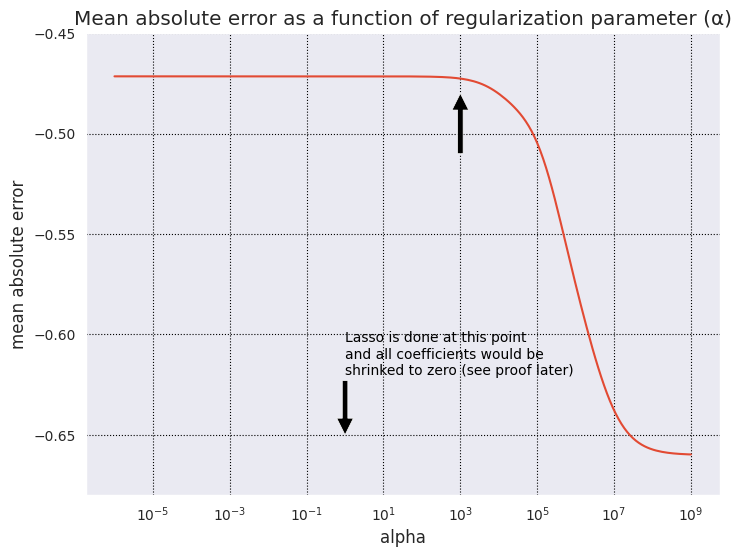

Total Run Time:
131.82856413299987 Seconds


In [ ]:
start_time = time.perf_counter()

clf = Ridge()
error = []
alphas = np.logspace(-6, 9, 200)

for a in alphas:
    clf.set_params(alpha=a)
    mae_val = make_scorer(mean_absolute_error, greater_is_better=False)
    error.append(cross_val_score(clf, X2, Y, cv=5, scoring=mae_val, n_jobs=1).mean())

plt.figure(figsize=(18, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, error)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('mean absolute error')
plt.title('Mean absolute error as a function of regularization parameter (α)')
plt.axis('tight')

plt.annotate('Lasso is done at this point \nand all coefficients would be \nshrinked to zero (see proof later)',
xy=(1, -0.65), xytext=(1, -0.62), arrowprops=dict(facecolor='black'), color='black')
plt.annotate('',
xy=(1000, -0.48), xytext=(1000, -0.51), arrowprops=dict(facecolor='black'), color='black')
plt.grid(color='black', linestyle='dotted')
plt.ylim([-0.68,-0.45])
plt.show()

end_time = time.perf_counter()
print("Total Run Time:")
print(end_time - start_time, "Seconds")

##Regresión Lasso (Penalización L1):
Lasso es otra forma de evitar el sobreajuste. También agrega una penalización para los coeficientes β no nulos. A diferencia de la regresión Ridge que penaliza la suma de los coeficientes al cuadrado, Lasso penaliza la suma de los valores absolutos de los coeficientes β. Por lo tanto, para valores muy altos de λ, muchos coeficientes β no solo se reducen, sino que se vuelven exactamente cero bajo Lasso. Aquí, estamos probando la Regresión Lasso con un parámetro de regularización (α) igual a 0.0001.

In [ ]:
from sklearn.linear_model import Lasso
model3 = Lasso(alpha=0.0001,random_state=seed)
mae_val = make_scorer(mean_absolute_error, greater_is_better=False)
results3 = cross_val_score(model3, X_train, y_train, cv=5, scoring=mae_val, n_jobs=1)
print("Linear Regression Lasso (Manual Tuning): ({0:.3f}) +/- ({1:.3f})".format(results3.mean(), results3.std()))

Linear Regression Lasso (Manual Tuning): (-0.472) +/- (0.002)


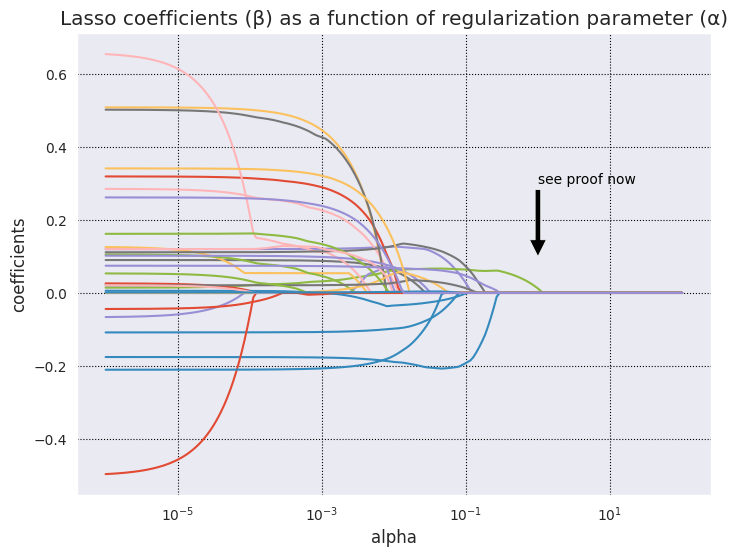

Total Run Time:
636.177329909 Seconds


In [ ]:
start_time = time.perf_counter()

#clf = Lasso(tol=0.00001, max_iter=10000)
clf = Lasso()
coefs = []
alphas = np.logspace(-6, 2, 200)

for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X2, Y)
    coefs.append(clf.coef_)

plt.figure(figsize=(18, 6))
plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.title('Lasso coefficients (β) as a function of regularization parameter (α)')
plt.axis('tight')

plt.annotate('see proof now',
xy=(1, 0.1), xytext=(1, 0.3), arrowprops=dict(facecolor='black'), color='black')
plt.grid(color='black', linestyle='dotted')
plt.show()

end_time = time.perf_counter()
print("Total Run Time:")
print(end_time - start_time, "Seconds")

Podemos observar que con alpha = 1, los coeficientes se reducen exactamente a cero para Lasso.

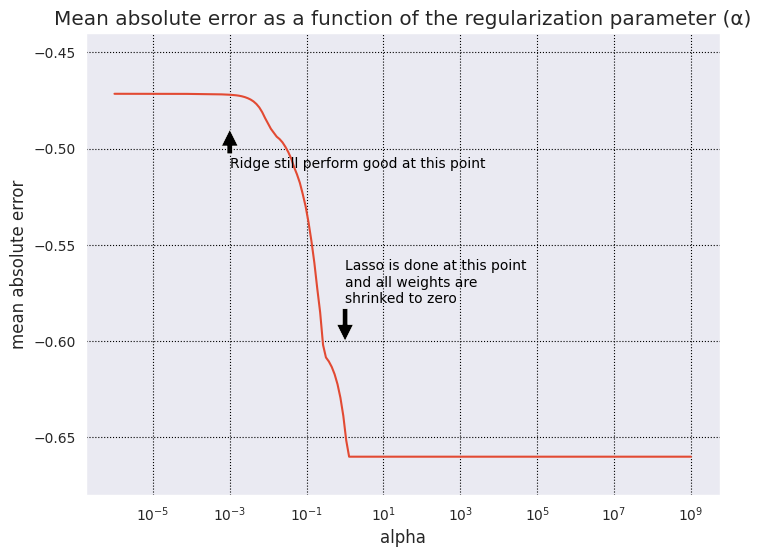

Total Run Time:
1484.122660655 Seconds


In [ ]:
start_time = time.perf_counter()

clf = Lasso()
error = []
alphas = np.logspace(-6, 9, 200)

for a in alphas:
    clf.set_params(alpha=a)
    mae_val = make_scorer(mean_absolute_error, greater_is_better=False)
    error.append(cross_val_score(clf, X2, Y, cv=5, scoring=mae_val, n_jobs=1).mean())

plt.figure(figsize=(18, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, error)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('mean absolute error')
plt.title('Mean absolute error as a function of the regularization parameter (α)')
plt.axis('tight')

plt.annotate('Lasso is done at this point \nand all weights are \nshrinked to zero',
xy=(1, -0.60), xytext=(1, -0.58), arrowprops=dict(facecolor='black'), color='black')
plt.annotate('Ridge still perform good at this point',
xy=(0.001, -0.49), xytext=(0.001, -0.51), arrowprops=dict(facecolor='black'), color='black')
plt.grid(color='black', linestyle='dotted')
plt.ylim([-0.68,-0.44])
plt.show()

end_time = time.perf_counter()
print("Total Run Time:")
print(end_time - start_time, "Seconds")

##Regresión Elastic Net:
Elastic Net es una mezcla de Ridge y Lasso. Si establecemos l1_ratio = 0, la penalización es 100% de la penalización L2 (Regresión Ridge). Si tomamos l1_ratio = 1, es 100% de la penalización L1 (Regresión Lasso). Para cualquier valor de l1_ratio = x donde 0 < x < 1, la penalización es una combinación de L1 (x%) y L2 (100-x)%.

In [ ]:
from sklearn.linear_model import ElasticNet
model4 = ElasticNet(alpha=0.0001,l1_ratio=0.5,random_state=seed)
mae_val = make_scorer(mean_absolute_error, greater_is_better=False)
results4 = cross_val_score(model4, X_train, y_train, cv=5, scoring=mae_val, n_jobs=1)
print("Linear Regression Elastic Net (Manual Tuning): ({0:.3f}) +/- ({1:.3f})".format(results4.mean(), results4.std()))

Linear Regression Elastic Net (Manual Tuning): (-0.472) +/- (0.002)


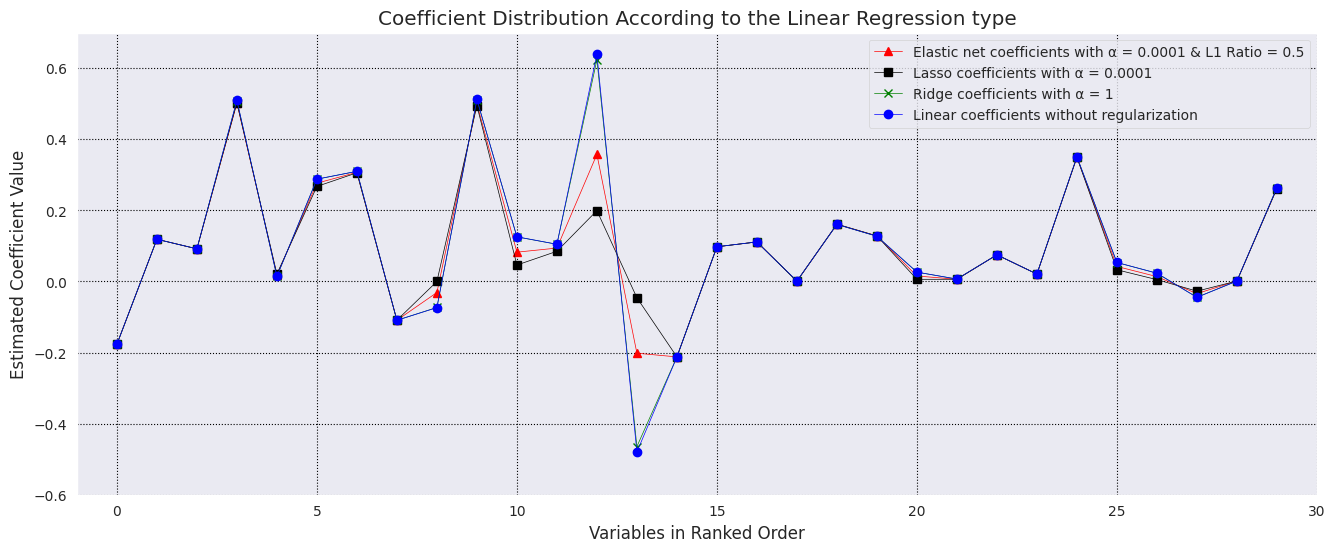

In [ ]:
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train, y_train)
ridge = Ridge(alpha=1,random_state=seed)
ridge.fit(X_train, y_train)
linear = LinearRegression()
linear.fit(X_train, y_train)
enet = ElasticNet(alpha=0.0001, l1_ratio=0.5)
enet.fit(X_train, y_train)

plt.figure(figsize = (16, 6))
plt.plot(enet.coef_, color='red', linewidth=0.5, marker='^', label='Elastic net coefficients with α = 0.0001 & L1 Ratio = 0.5')
plt.plot(lasso.coef_, color='black', linewidth=0.5, marker='s', label='Lasso coefficients with α = 0.0001')
plt.plot(ridge.coef_, color='green', linewidth=0.5, marker='x', label='Ridge coefficients with α = 1')
plt.plot(linear.coef_, color='blue', linewidth=0.5, marker='o', label='Linear coefficients without regularization')
plt.grid(color='black', linestyle='dotted')
plt.ylim([-0.6,0.7])
plt.xlim([-1,30])
plt.legend(loc='best')
plt.title('Coefficient Distribution According to the Linear Regression type')
plt.xlabel('Variables in Ranked Order')
plt.ylabel('Estimated Coefficient Value')
plt.show()

Podemos observar variación en la clasificación de variables (para los valores de coeficientes estimados) solo en el rango de 10-15. Para otros rangos, las gráficas son bastante similares, coincidiendo los puntos. La fluctuación en el valor del coeficiente es mayor para la curva azul, es decir, para los coeficientes lineales sin regularización, lo cual es obvio.

Intentemos trazar los residuos para los modelos de Ridge, Lasso y Elastic Net que utilizamos aquí.

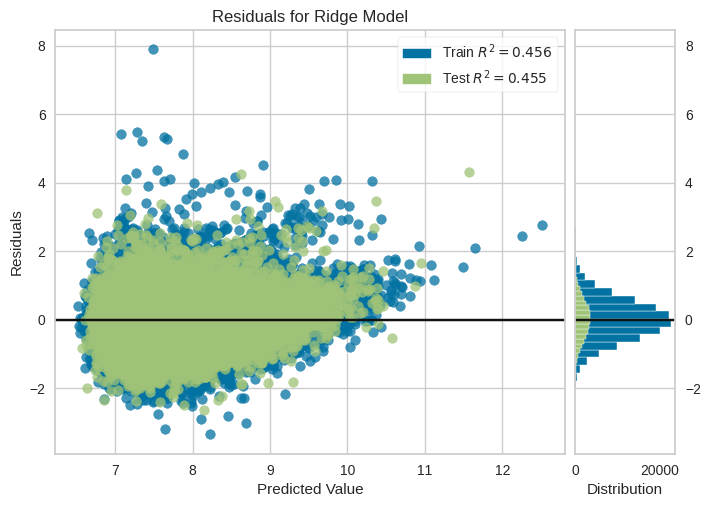

<Axes: title={'center': 'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
from yellowbrick.regressor import ResidualsPlot
viz_r = ResidualsPlot(ridge)
viz_r.fit(X_train, y_train)
viz_r.score(X_test, y_test)
viz_r.show()

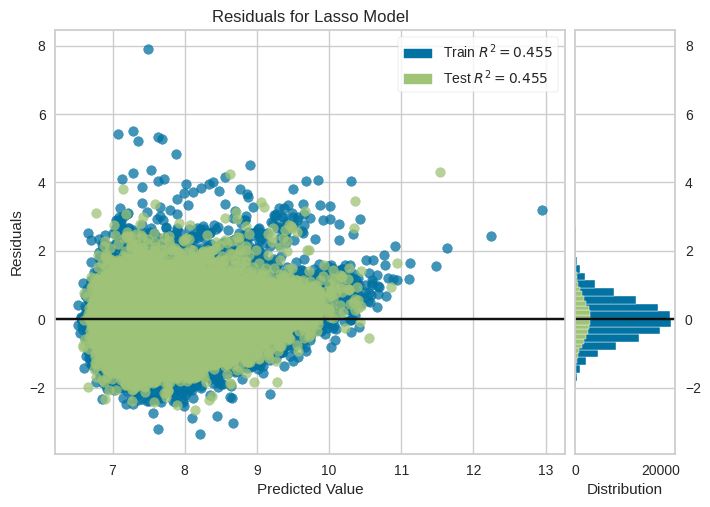

<Axes: title={'center': 'Residuals for Lasso Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
viz_l = ResidualsPlot(lasso)
viz_l.fit(X_train, y_train)
viz_l.score(X_test, y_test)
viz_l.show()

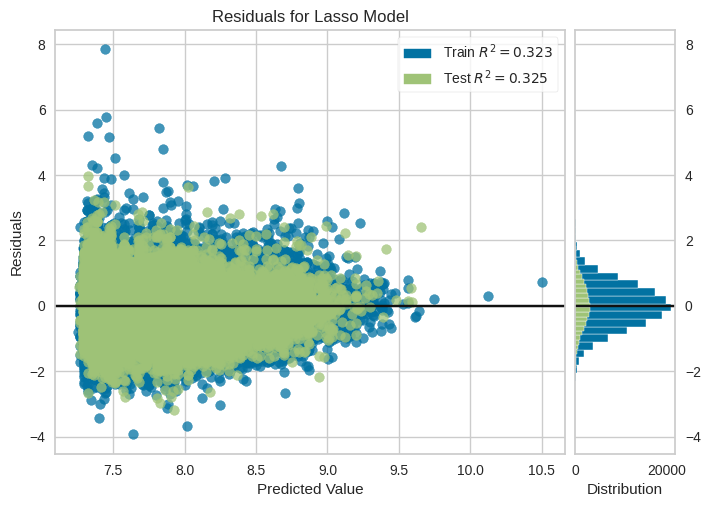

<Axes: title={'center': 'Residuals for Lasso Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
viz_l = ResidualsPlot(Lasso(alpha=0.1))
viz_l.fit(X_train, y_train)
viz_l.score(X_test, y_test)
viz_l.show()

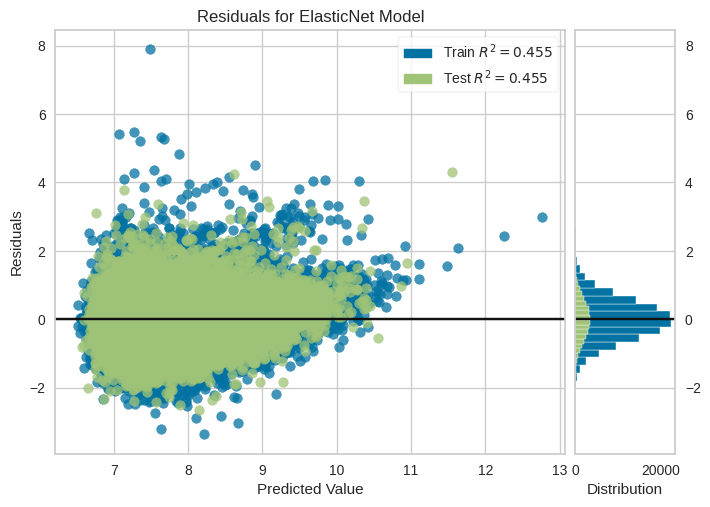

<Axes: title={'center': 'Residuals for ElasticNet Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
viz_e = ResidualsPlot(enet)
viz_e.fit(X_train, y_train)
viz_e.score(X_test, y_test)
viz_e.show()

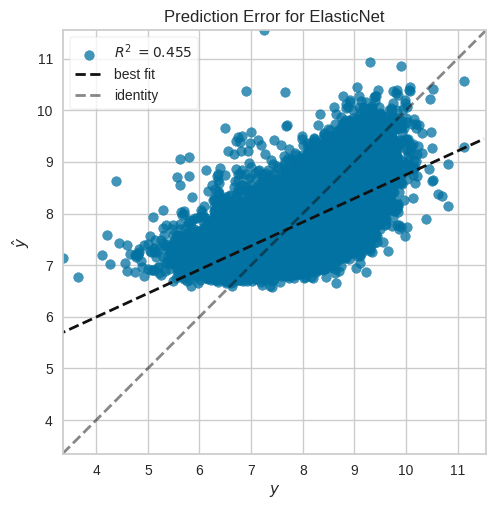

<Axes: title={'center': 'Prediction Error for ElasticNet'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [ ]:
from yellowbrick.regressor import PredictionError
viz_pe = PredictionError(enet)
viz_pe.fit(X_train, y_train)
viz_pe.score(X_test, y_test)
viz_pe.show()

In [ ]:
X_train.to_csv('X_train.csv')

In [ ]:
y_train.to_csv('y_train.csv')

El gráfico de error de predicción muestra los objetivos reales del conjunto de datos frente a los valores predichos generados por el modelo (Elastic Net). En este caso, hay una cantidad sustancial de varianza presente en el modelo. Intentemos ahora un algoritmo basado en árboles no lineales. Aquí probaremos solo con Random Forest.
##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
start_time = time.perf_counter()

model5 = RandomForestRegressor(n_jobs=-1,n_estimators=300, max_features=12, random_state=seed)
mae_val = make_scorer(mean_absolute_error, greater_is_better=False)
results5 = cross_val_score(model5, X_train, y_train, cv=5, scoring=mae_val, n_jobs=1)
print("Random Forest Regressor (Manual Tuning): ({0:.10f}) +/- ({1:.3f})".format(-1*results5.mean(), results5.std()))

end_time = time.perf_counter()
print("Total Run Time:")
print(end_time - start_time, "Seconds")

Random Forest Regressor (Manual Tuning): (0.4528740805) +/- (0.002)
Total Run Time:
754.550374208 Seconds


Comenzamos probando un modelo de bosque con 300 árboles. Su rendimiento fue peor que el de la regresión lineal. La puntuación de validación cruzada es 0.45, que es inferior a 0.47, es decir, la puntuación de validación cruzada que observamos con diferentes modelos de regresión. Por lo tanto, deberíamos continuar probando con diferentes cantidades de árboles (la cantidad óptima de árboles) para verificar cuándo el bosque tiene un mejor rendimiento.

In [ ]:
start_time = time.perf_counter()

h = [1, 2, 5, 10, 100, 500, 1000]
scores = []

for val in h:
    model = RandomForestRegressor(n_jobs=-1,n_estimators=val, max_features=12, random_state=seed)
    mae_val = make_scorer(mean_absolute_error, greater_is_better=False)
    results = cross_val_score(model, X_train, y_train, cv=2, scoring=mae_val, n_jobs=1)
    scores.append(-1*results.mean())

end_time = time.perf_counter()
print("Total Run Time:")
print(end_time - start_time, "Seconds")

Total Run Time:
948.934114271 Seconds


In [ ]:
scores

[0.6447148109838683,
 0.5566957859774007,
 0.49742172188840794,
 0.47550379946403887,
 0.4552260831476793,
 0.45310224054161297,
 0.45288609320871154]

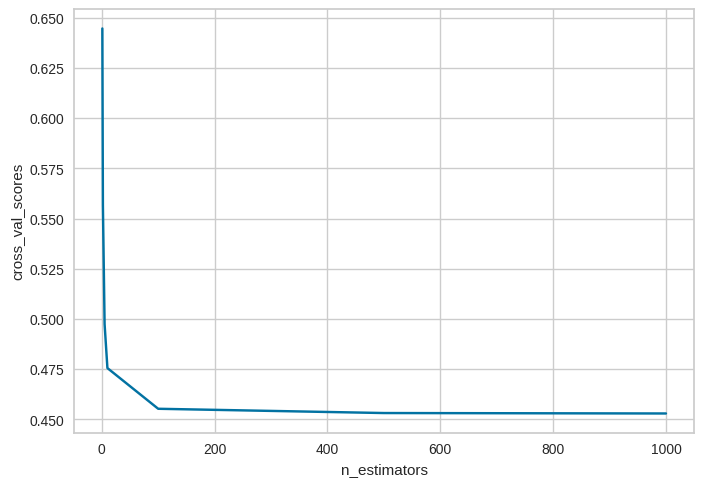

In [ ]:
import pandas as pd
df = pd.DataFrame(list(zip(h, scores)), columns=['n_estimators','cross_val_scores'])
ax = sns.lineplot(x="n_estimators", y="cross_val_scores", data=df)

Por observación, es evidente que la puntuación de validación cruzada está aumentando a medida que disminuimos la cantidad de árboles (n_estimators). Casi no hay mejora cuando el número de estimadores supera los 100. Por lo tanto, idealmente deberíamos usar n_estimators = 1 para obtener el mejor resultado.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model_1n = RandomForestRegressor(n_jobs=-1,n_estimators=1, max_features=12, random_state=seed)
model_1n.fit(X_train, y_train)

RandomForestRegressor(max_features=12, n_estimators=1, n_jobs=-1,
                      random_state=12345)

In [ ]:
model_10n = RandomForestRegressor(n_jobs=-1,n_estimators=10, max_features=12, random_state=seed)
model_10n.fit(X_train, y_train)

RandomForestRegressor(max_features=12, n_estimators=10, n_jobs=-1,
                      random_state=12345)

Ahora notaremos el nivel de aleatoriedad en bosques compuestos por 1 árbol y por 10 árboles, respectivamente.

In [ ]:
from sklearn.tree import _tree
def leaf__depths(estimator, nodeid = 0):
     left__child = estimator.children_left[nodeid]
     right__child = estimator.children_right[nodeid]

     if left__child == _tree.TREE_LEAF:
         depths = np.array([0])
     else:
         left__depths = leaf__depths(estimator, left__child) + 1
         right__depths = leaf__depths(estimator, right__child) + 1
         depths = np.append(left__depths, right__depths)

     return depths

In [ ]:
def leaf__samples(estimator, nodeid = 0):
     left__child = estimator.children_left[nodeid]
     right__child = estimator.children_right[nodeid]

     if left__child == _tree.TREE_LEAF:
         samples = np.array([estimator.n_node_samples[nodeid]])
     else:
         left__samples = leaf__samples(estimator, left__child)
         right__samples = leaf__samples(estimator, right__child)
         samples = np.append(left__samples, right__samples)

     return samples

In [ ]:
def visualization__estimator(ensemble, tree_id=0):

     plt.figure(figsize=(8,8))
     plt.subplot(211)

     estimator = ensemble.estimators_[tree_id].tree_
     depths = leaf__depths(estimator)

     plt.hist(depths, histtype='step', bins=range(min(depths), max(depths)+1))
     plt.grid(color='black', linestyle='dotted')
     plt.xlabel("Depth of leaf nodes (tree %s)" % tree_id)
     plt.show()

In [ ]:
def visualization__forest(ensemble):

     plt.figure(figsize=(8,8))
     plt.subplot(211)

     depths__all = np.array([], dtype=int)

     for x in ensemble.estimators_:
         estimator = x.tree_
         depths = leaf__depths(estimator)
         depths__all = np.append(depths__all, depths)
         plt.hist(depths, histtype='step', bins=range(min(depths), max(depths)+1))

     plt.hist(depths__all, histtype='step',
              bins=range(min(depths__all), max(depths__all)+1),
              weights=np.ones(len(depths__all))/len(ensemble.estimators_),
              linewidth=2)
     plt.grid(color='black', linestyle='dotted')
     plt.xlabel("Depth of leaf nodes")

     plt.show()

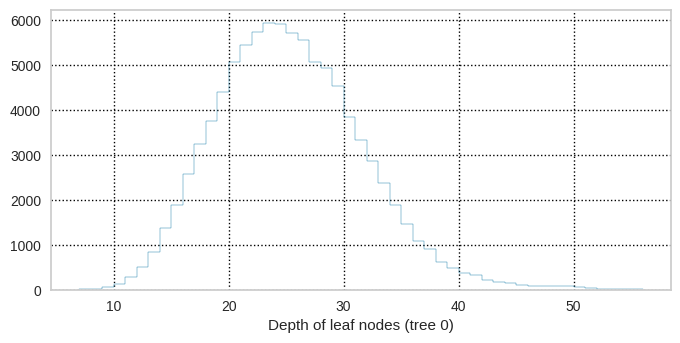

Total Run Time:
1.4677182949999406 Seconds


In [ ]:
start_time = time.perf_counter()

visualization__estimator(model_1n)

end_time = time.perf_counter()
print("Total Run Time:")
print(end_time - start_time, "Seconds")

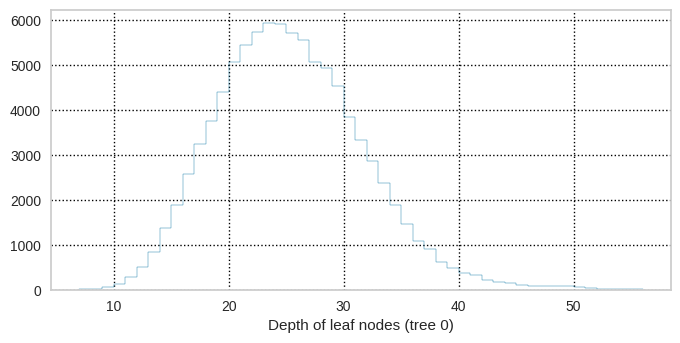

Total Run Time:
4.64687589299956 Seconds


In [ ]:
start_time = time.perf_counter()

visualization__estimator(model_10n)

end_time = time.perf_counter()
print("Total Run Time:")
print(end_time - start_time, "Seconds")

Observación: No vemos casi ninguna diferencia en ambos gráficos. Esto se debe probablemente a que la diferencia en la cantidad de estimadores no es grande. La brecha entre 1 y 10 es bastante pequeña.

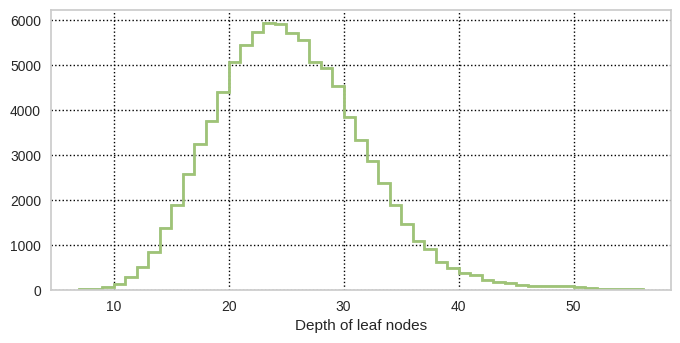

Total Run Time:
1.3607082319995243 Seconds


In [ ]:
start_time = time.perf_counter()

visualization__forest(model_1n)

end_time = time.perf_counter()
print("Total Run Time:")
print(end_time - start_time, "Seconds")

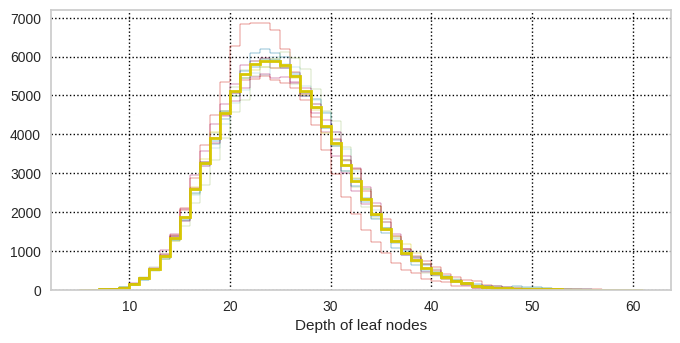

Total Run Time:
13.698491319000823 Seconds


In [ ]:
start_time = time.perf_counter()

visualization__forest(model_10n)

end_time = time.perf_counter()
print("Total Run Time:")
print(end_time - start_time, "Seconds")

Observación: Al visualizar el bosque, podemos ver que 10 curvas se superponen para el modelo con n_estimators = 10. Hay variación en la profundidad de los nodos de las hojas para cada estimador en los bins ubicados en el medio.

Ahora, introduciremos el parámetro max_depth en el modelo y verificaremos los gráficos.

In [ ]:
model_1n_md = RandomForestRegressor(n_jobs=-1,n_estimators=1, max_features=12, max_depth=20, random_state=seed)
model_1n_md.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, max_features=12, n_estimators=1, n_jobs=-1,
                      random_state=12345)

In [ ]:
model_10n_md = RandomForestRegressor(n_jobs=-1,n_estimators=10, max_features=12, max_depth=20, random_state=seed)
model_10n_md.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, max_features=12, n_estimators=10, n_jobs=-1,
                      random_state=12345)

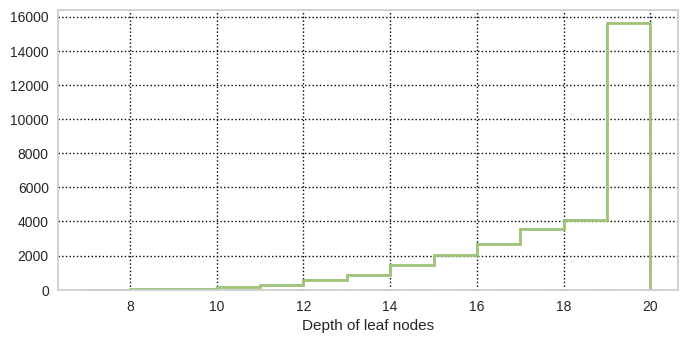

Total Run Time:
1.1174398909988668 Seconds


In [ ]:
start_time = time.perf_counter()

visualization__forest(model_1n_md)

end_time = time.perf_counter()
print("Total Run Time:")
print(end_time - start_time, "Seconds")

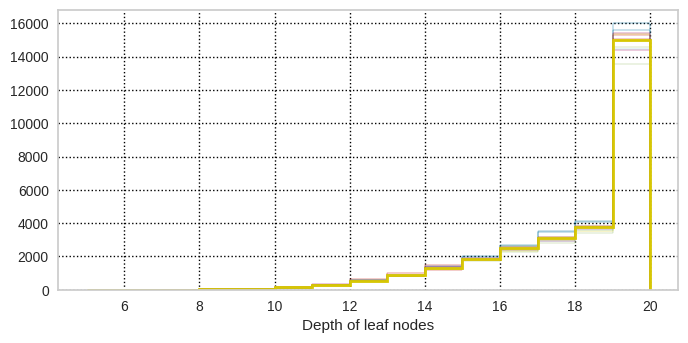

Total Run Time:
3.9557655539992993 Seconds


In [ ]:
start_time = time.perf_counter()

visualization__forest(model_10n_md)

end_time = time.perf_counter()
print("Total Run Time:")
print(end_time - start_time, "Seconds")

**Observación:** Vemos un aumento escalonado (uniformemente incrementado) en la profundidad de los nodos de las hojas. Sin embargo, el aumento es excepcionalmente pronunciado al pasar de una profundidad de nodos de hojas '19' a '20'.

A continuación, introduciremos el parámetro min_samples_leaf y observaremos los gráficos más detenidamente.

In [ ]:
model_1n_msl = RandomForestRegressor(n_jobs=-1,n_estimators=1, max_features=12, min_samples_leaf=6, max_depth=20, random_state=seed)
model_1n_msl.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, max_features=12, min_samples_leaf=6,
                      n_estimators=1, n_jobs=-1, random_state=12345)

In [ ]:
model_10n_msl = RandomForestRegressor(n_jobs=-1,n_estimators=10, max_features=12, min_samples_leaf=6, max_depth=20, random_state=seed)
model_10n_msl.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, max_features=12, min_samples_leaf=6,
                      n_estimators=10, n_jobs=-1, random_state=12345)

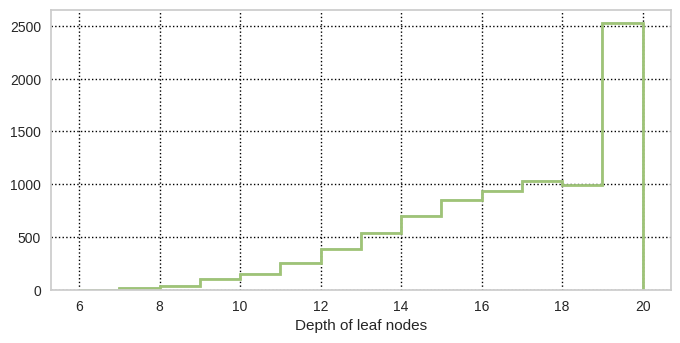

Total Run Time:
0.38502794399937557 Seconds


In [ ]:
start_time = time.perf_counter()

visualization__forest(model_1n_msl)

end_time = time.perf_counter()
print("Total Run Time:")
print(end_time - start_time, "Seconds")

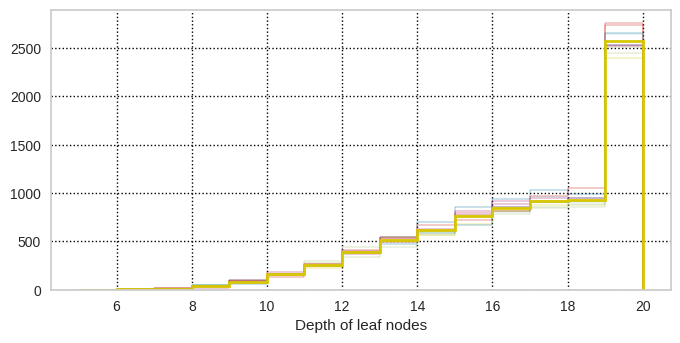

Total Run Time:
1.3143798090004566 Seconds


In [ ]:
start_time = time.perf_counter()

visualization__forest(model_10n_msl)

end_time = time.perf_counter()
print("Total Run Time:")
print(end_time - start_time, "Seconds")

**Observación:** Podemos ver que el aumento en la profundidad se ha vuelto no uniformemente incrementado al introducir min_samples_leaf. A veces, la curva también está disminuyendo (por ejemplo, para el bosque con un solo árbol, se observa una disminución al pasar de una profundidad de '18' a '19'). Esto es totalmente lógico, ya que min_samples_leaf denota la cantidad de hojas que debe haber en cada nodo hoja. Se prefiere un bajo número de min_samples_leaf. Lo dejaremos como predeterminado.

**Modelo final:** Elegiremos "model_1n_md" ya que ha producido el mejor gráfico.

In [ ]:
pred=df_test.drop('id',axis=1)
test_data_ = df_test[['cat80', 'cat79', 'cat87', 'cat57', 'cat101', 'cat12', 'cont2', 'cat81', 'cat89', 'cont7', 'cat7', 'cat10', 'cont12', 'cont11', 'cat1', 'cat72', 'cat103', 'cat94',
                       'cat2', 'cont3', 'cat11', 'cat106', 'cat111', 'cat114', 'cat53', 'cat13', 'cat9', 'cont6', 'cat100', 'cat44']]
yp=model_1n_md.predict(test_data_)

In [ ]:
final_prediction = pd.read_csv('kaggle/sample_submission.csv')
final_prediction['loss'] = yp
final_prediction.head()

id      loss
0   4  7.556700
1   6  7.687864
2   9  8.608601
3  12  7.755056
4  15  6.884940

In [ ]:
final_prediction.to_csv('PrediccionesAllstate.csv', index=False)
print("archivo creado")

archivo creado
